In [121]:
%matplotlib inline

#Here we set the dimensions for the figures in this notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=16.375, 5.375
import matplotlib.pyplot as plt
import re
import numpy as np
import h5py
import pandas as pd
import math
import seaborn as sns
from collections import OrderedDict
from scipy.stats import iqr
import math
import warnings
warnings.filterwarnings('ignore')

In [49]:
targets = [("H3K27ac", "_narrow"), ("H3K36me3", ""), 
           ("H3K4me1", "_narrow"), ("H3K4me2", "_narrow"), ("H3K4me3", "_narrow"), ("H3K79me2", ""), 
           ("H3K9ac", "_narrow"), ("H3K9me3", ""), ("H4K20me1", ""), ("H3K27me3", ""), ("methylation", "")]

In [19]:
chrom_lengths = OrderedDict({'chr1':248956422,
'chr2':242193529,
'chr3':198295559,
'chr4':190214555,
'chr5':181538259,
'chr6':170805979,
'chr7':159345973,
'chr8':145138636,
'chr9':138394717,
'chr10':133797422,
'chr11':135086622,
'chr12':133275309,
'chr13':114364328,
'chr14':107043718,
'chr15':101991189,
'chr16':90338345,
'chr17':83257441,
'chr18':80373285,
'chr19':58617616,
'chr20':64444167,
'chr21':46709983,
'chr22':50818468,
'chrX':156040895,
'chrY':57227415})

In [4]:
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]
from matplotlib.colors import hex2color
colors = ['#1b9e77', "#d95f02", '#7570b3', '#e7298a']
# Converting from HEX into RGB\n",
colors = [hex2color(colors[i]) for i in range(len(colors))]

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

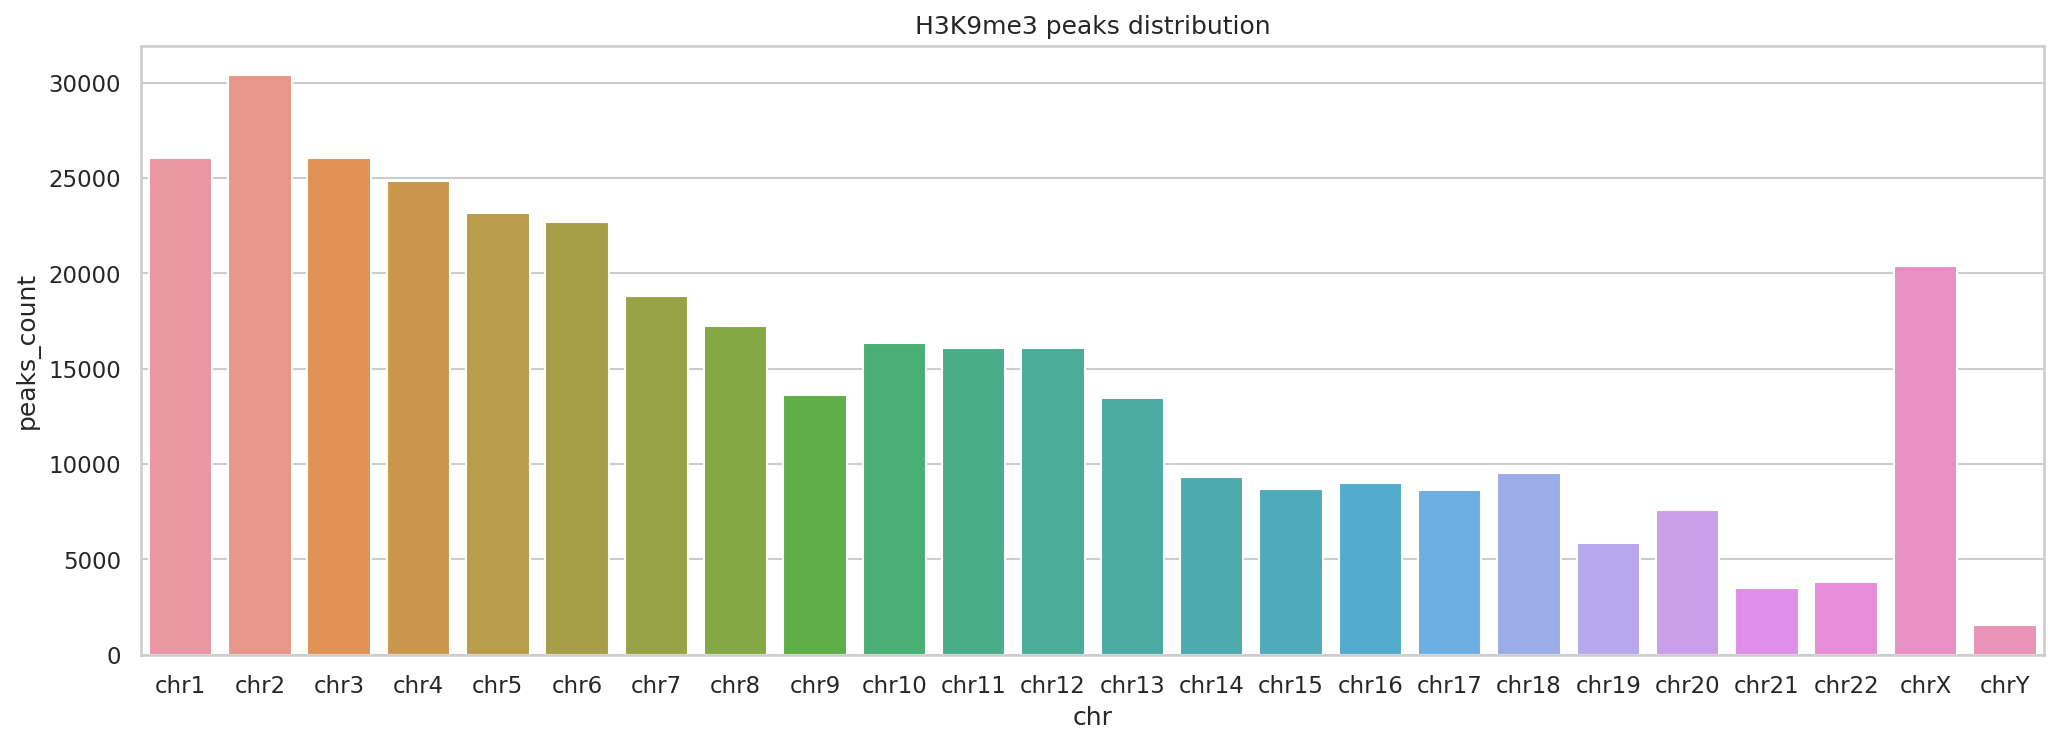

In [34]:
sns.set(style="whitegrid")
ax = sns.barplot(x="chr", y="peaks_count", data=peaks_count).set_title("H3K9me3 peaks distribution")

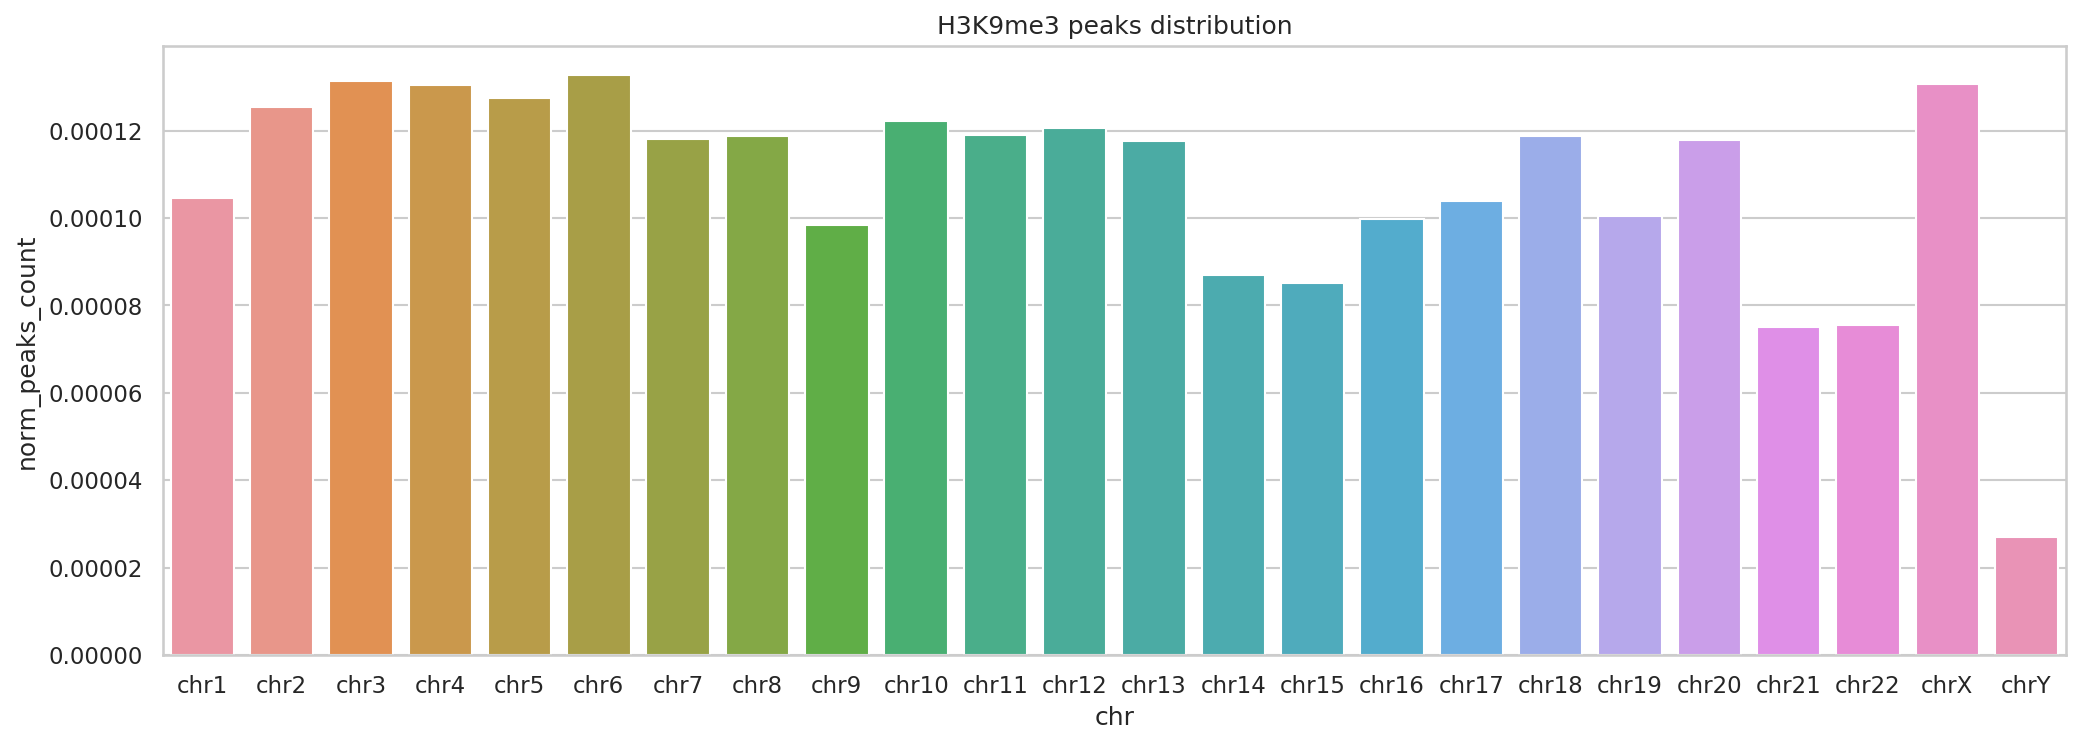

In [39]:
sns.set(style="whitegrid")
ax = sns.barplot(x="chr", y="norm_peaks_count", data=peaks_count).set_title("H3K9me3 peaks distribution")

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(x="chr", y="peaks_count", data=peaks_count).set_title("H3K9me3 peaks distribution")

In [43]:
target = "H3K9me3"
gene_id = "ENSG00000225470"
with h5py.File("../all_marks/" + target + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero.hdf5", 'r') as f:
    lncRNAs = list(f['lncRNAs_names'][:])
    corrs = f['corrs_matrix'][lncRNAs.index(gene_id), :]
        
nonzero_corrs = corrs[np.nonzero(corrs)[0]]
nonzero_peaks = ["peak_" + str(i) for i in np.nonzero(corrs)[0]]
df = pd.DataFrame(list(zip(nonzero_peaks, nonzero_corrs)), columns = ['peaks', 'corrs']) 
    
peaks = peaks[peaks[3].isin(nonzero_peaks)]
peaks = pd.merge(peaks, df, how='inner', left_on=3, right_on='peaks')[[0, 1, 2, 'corrs']]
peaks = peaks[peaks[0].isin(["chr" + str(i) for i in range(1, 23)] + ["chrX", "chrY"])]

In [47]:
peaks_by_chrs = peaks[peaks['corrs'] < 0].groupby([0]).count().sort_values([0], ascending=False)

In [58]:
# Теперь надо нормализовать на кол-во общих пиков
peaks_by_chrs.loc[['chrX', 'chr3']]

,1,2,3
0,,,
chrX,2550774,2550774,2550774
chr3,3336717,3336717,3336717


In [ ]:
#==========================================Идем по всем меткам и РНКам в ней========================================================

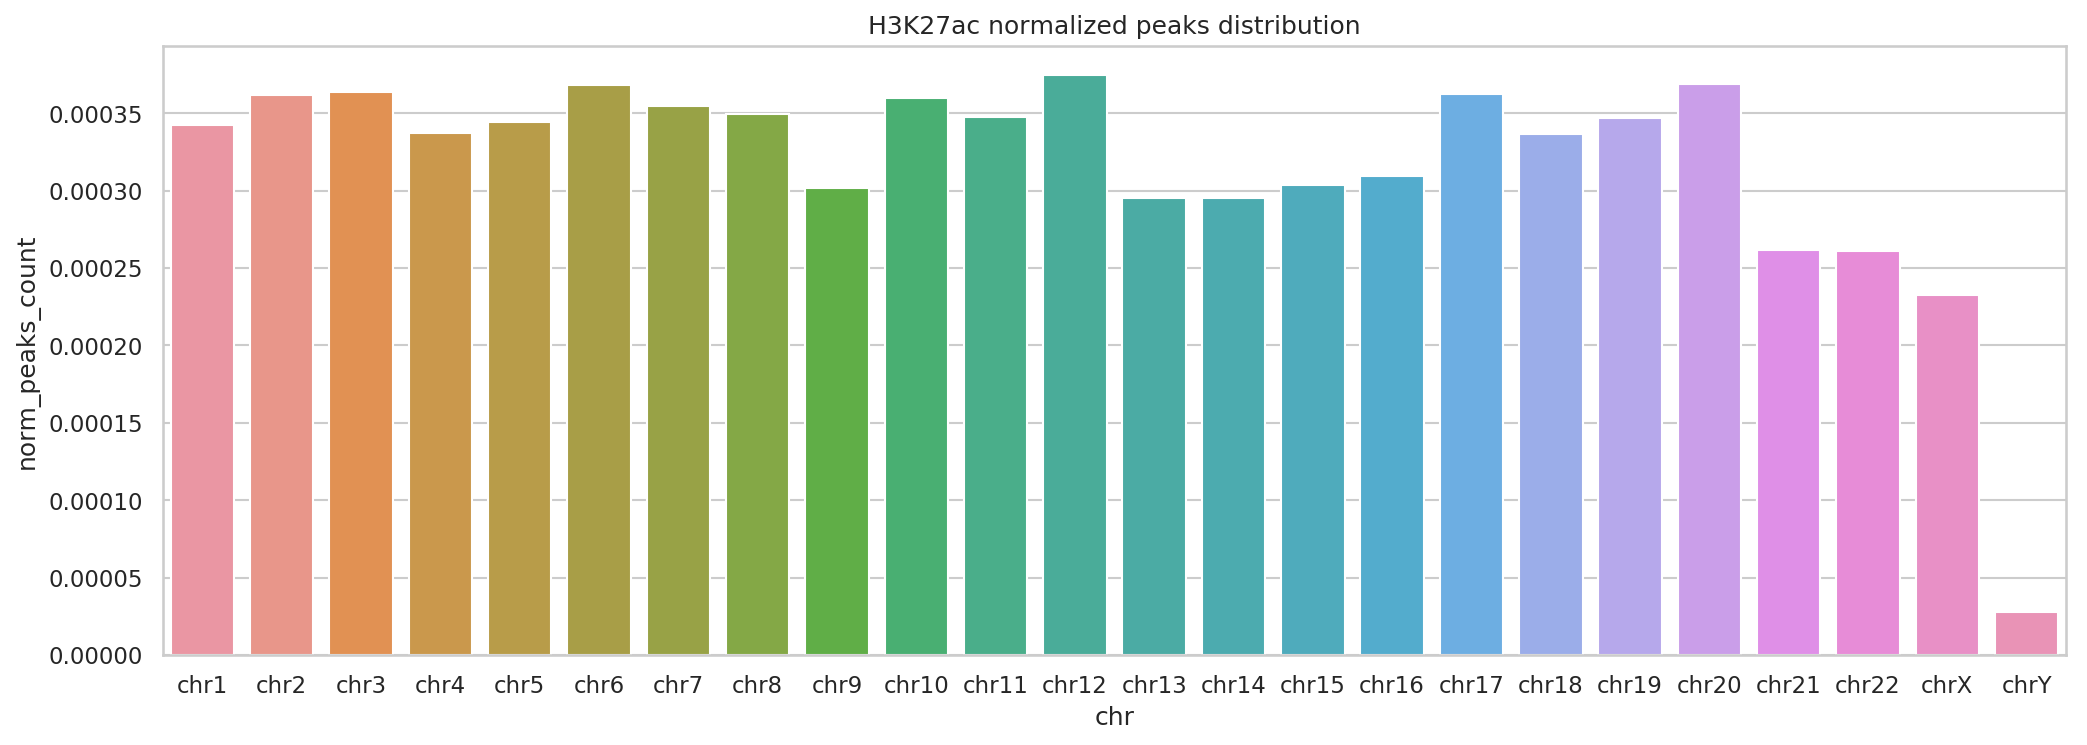

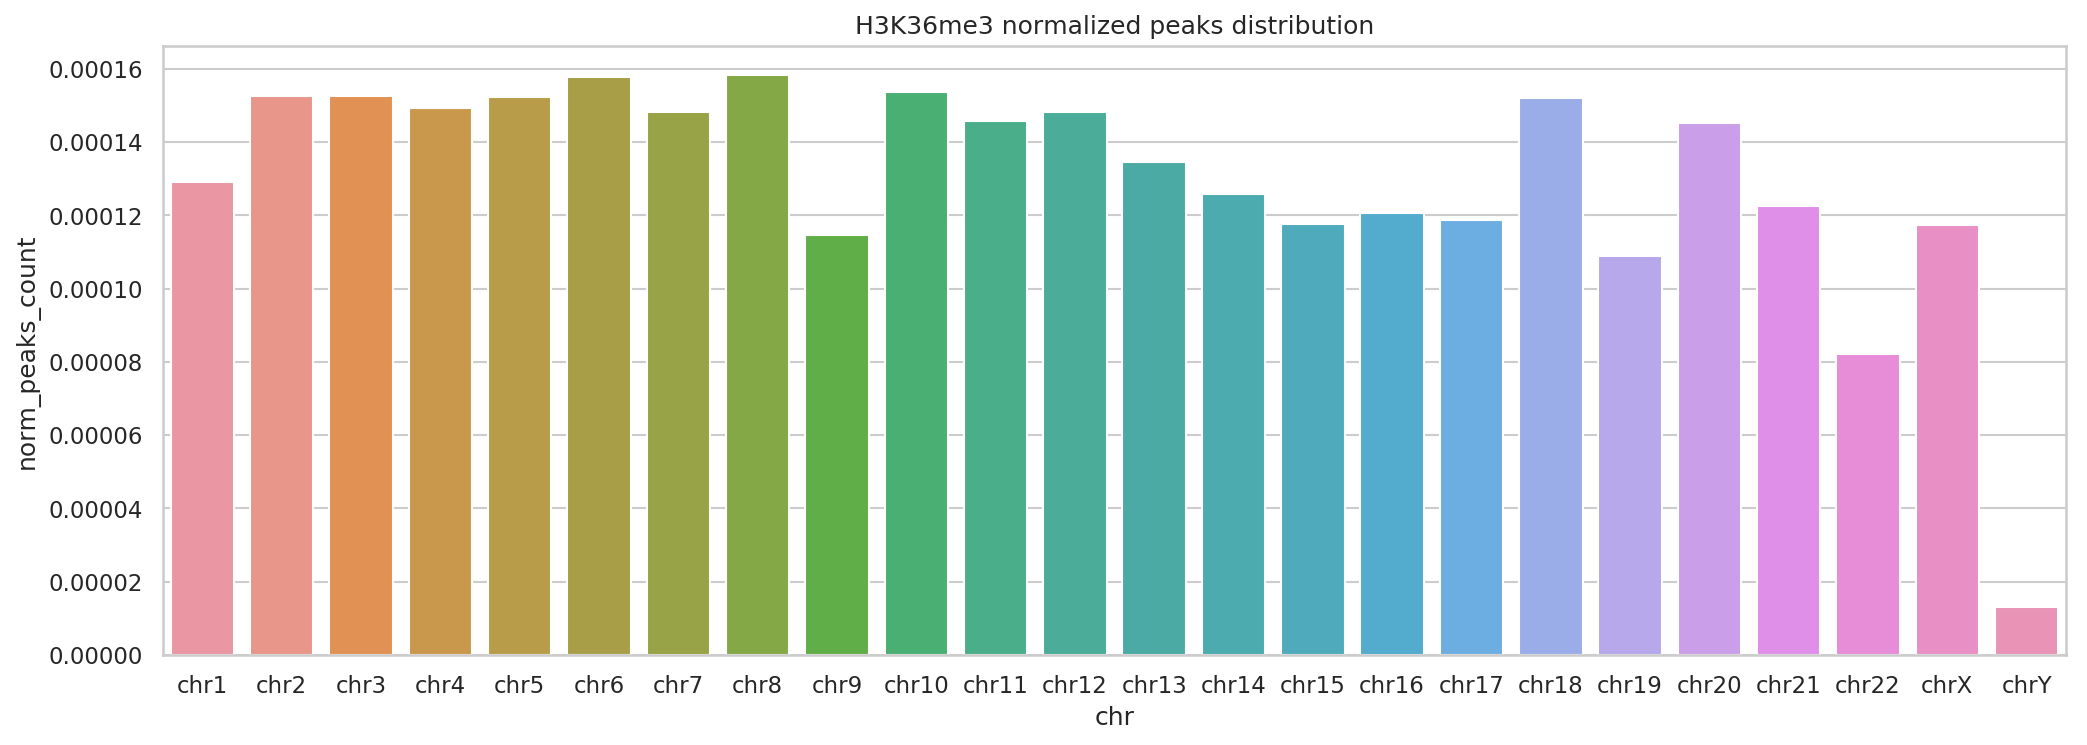

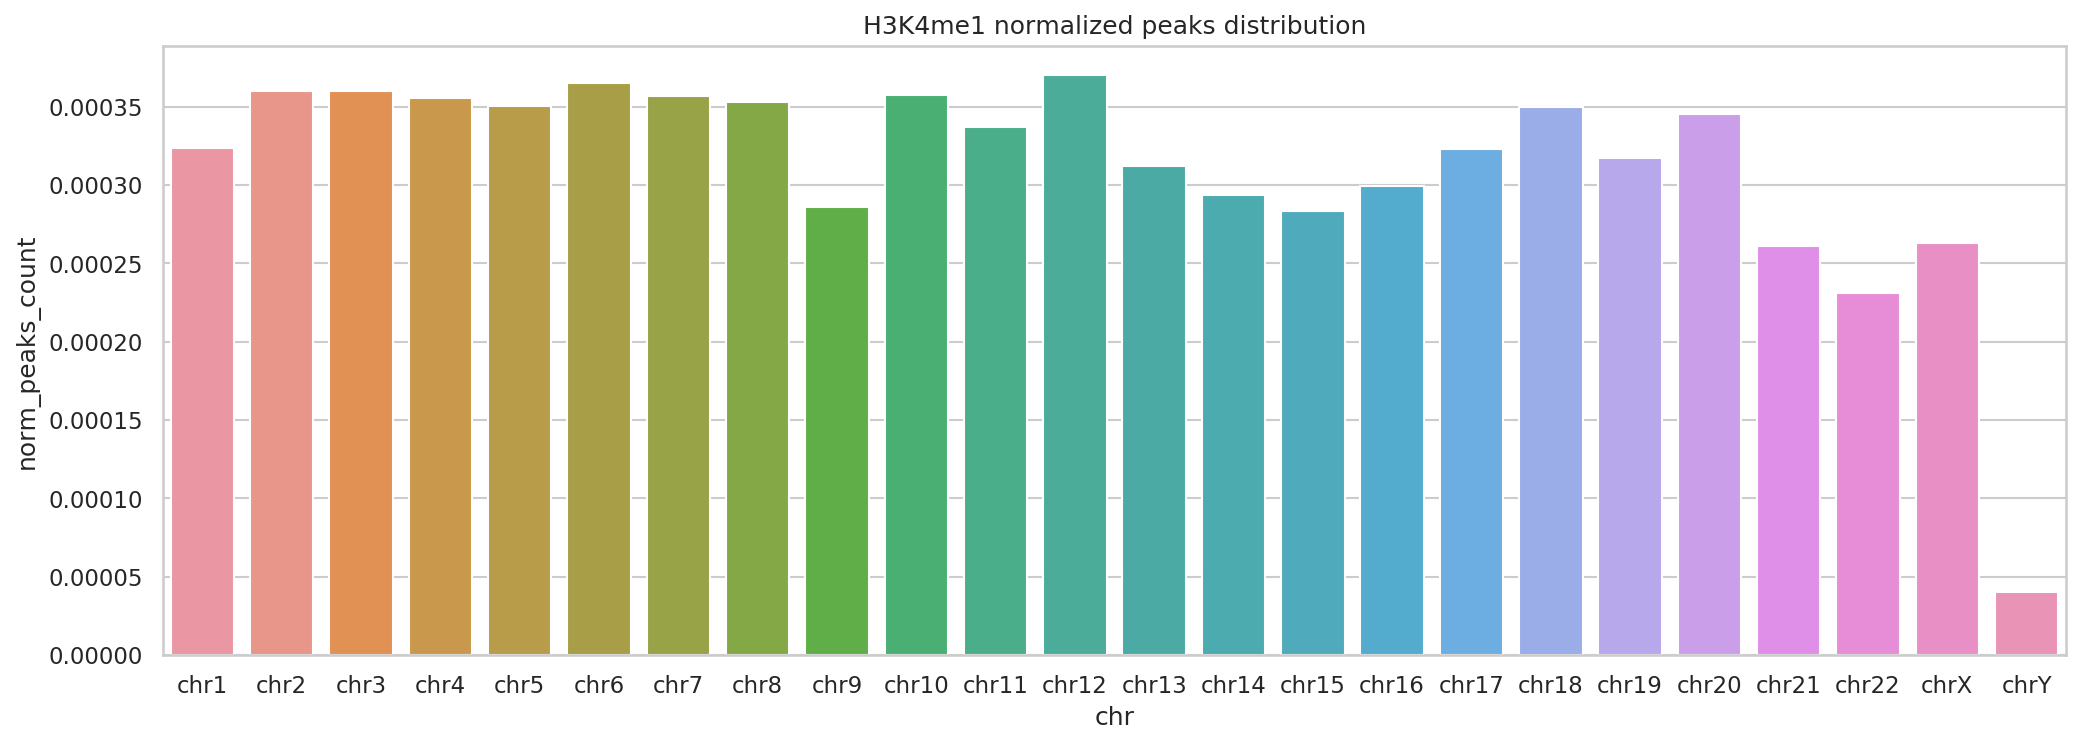

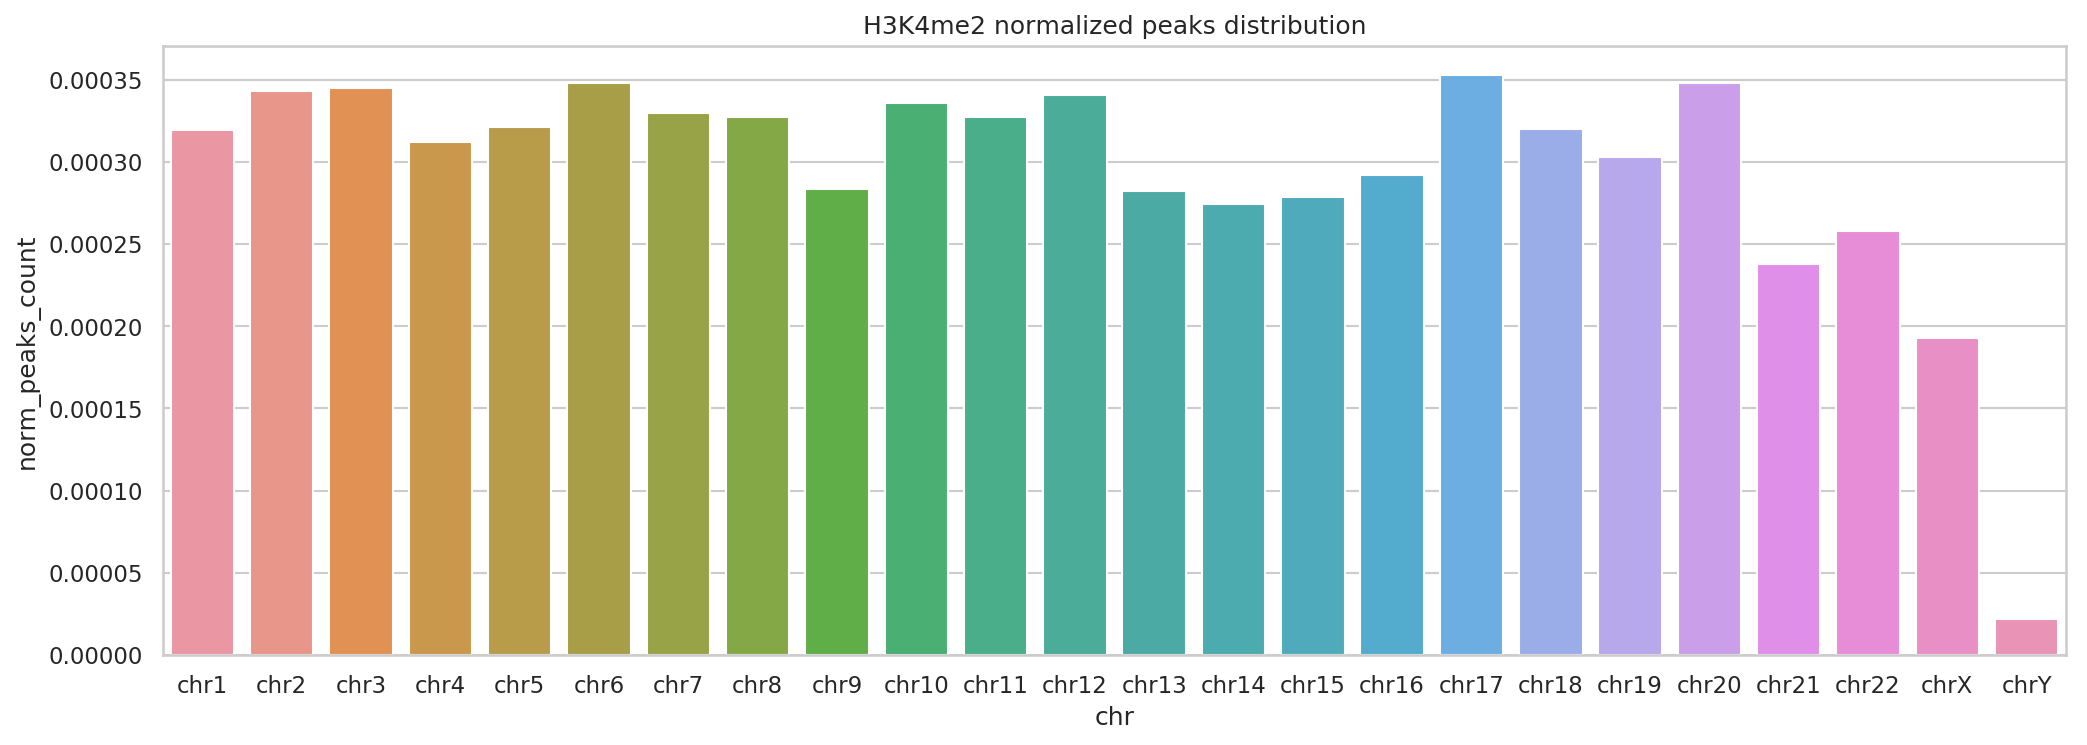

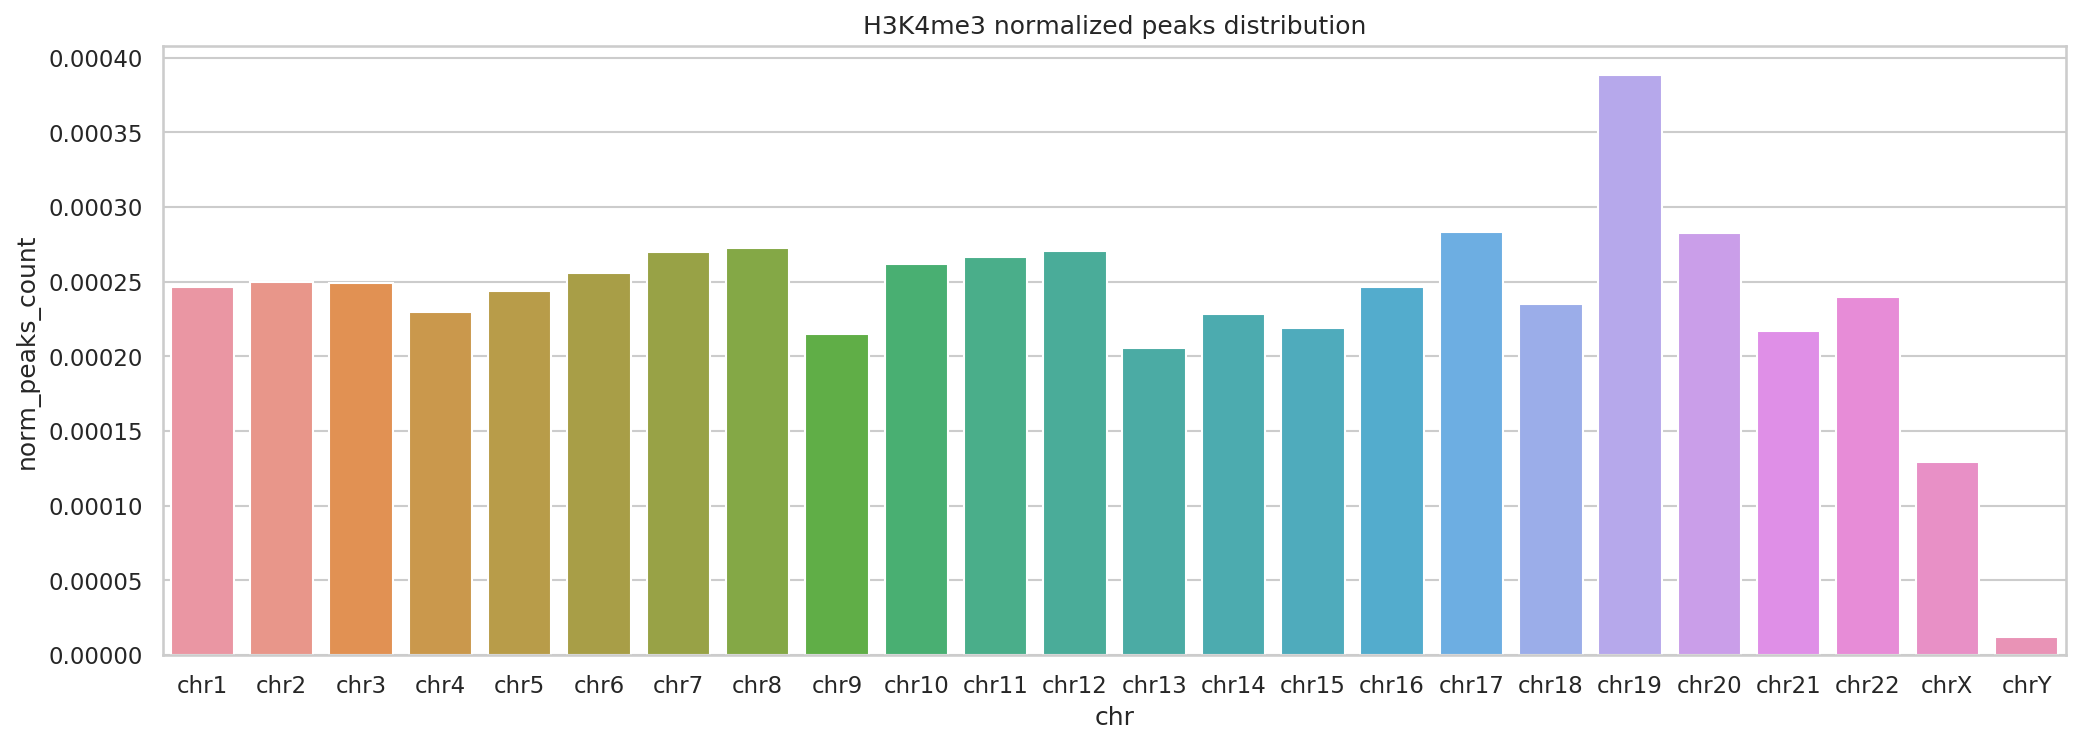

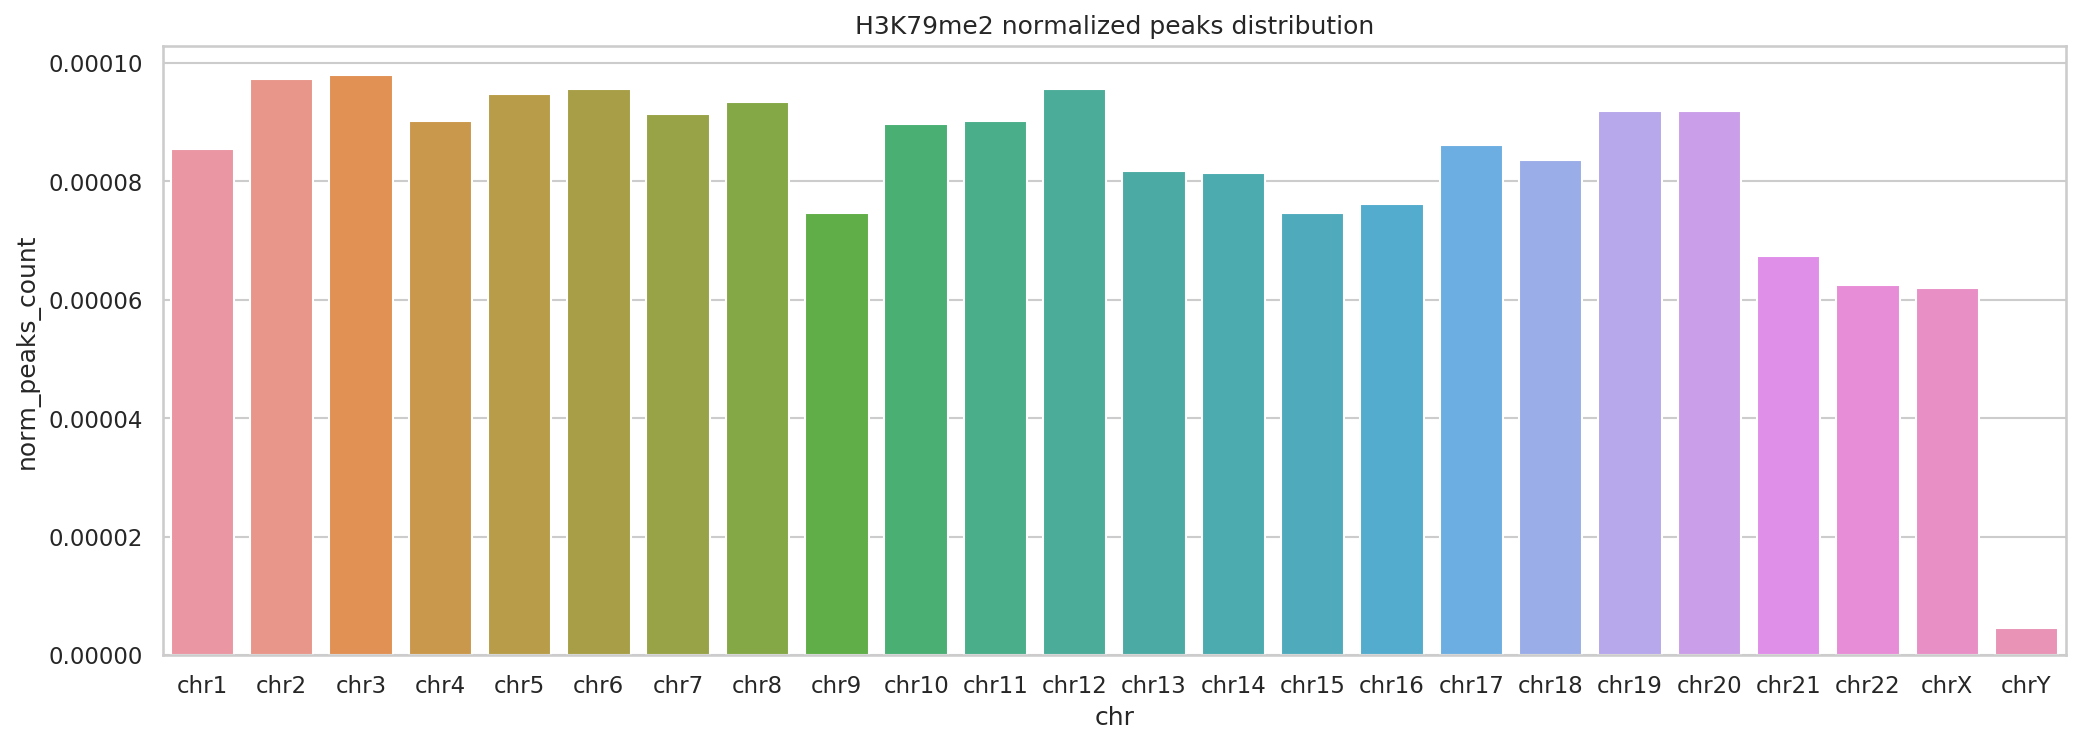

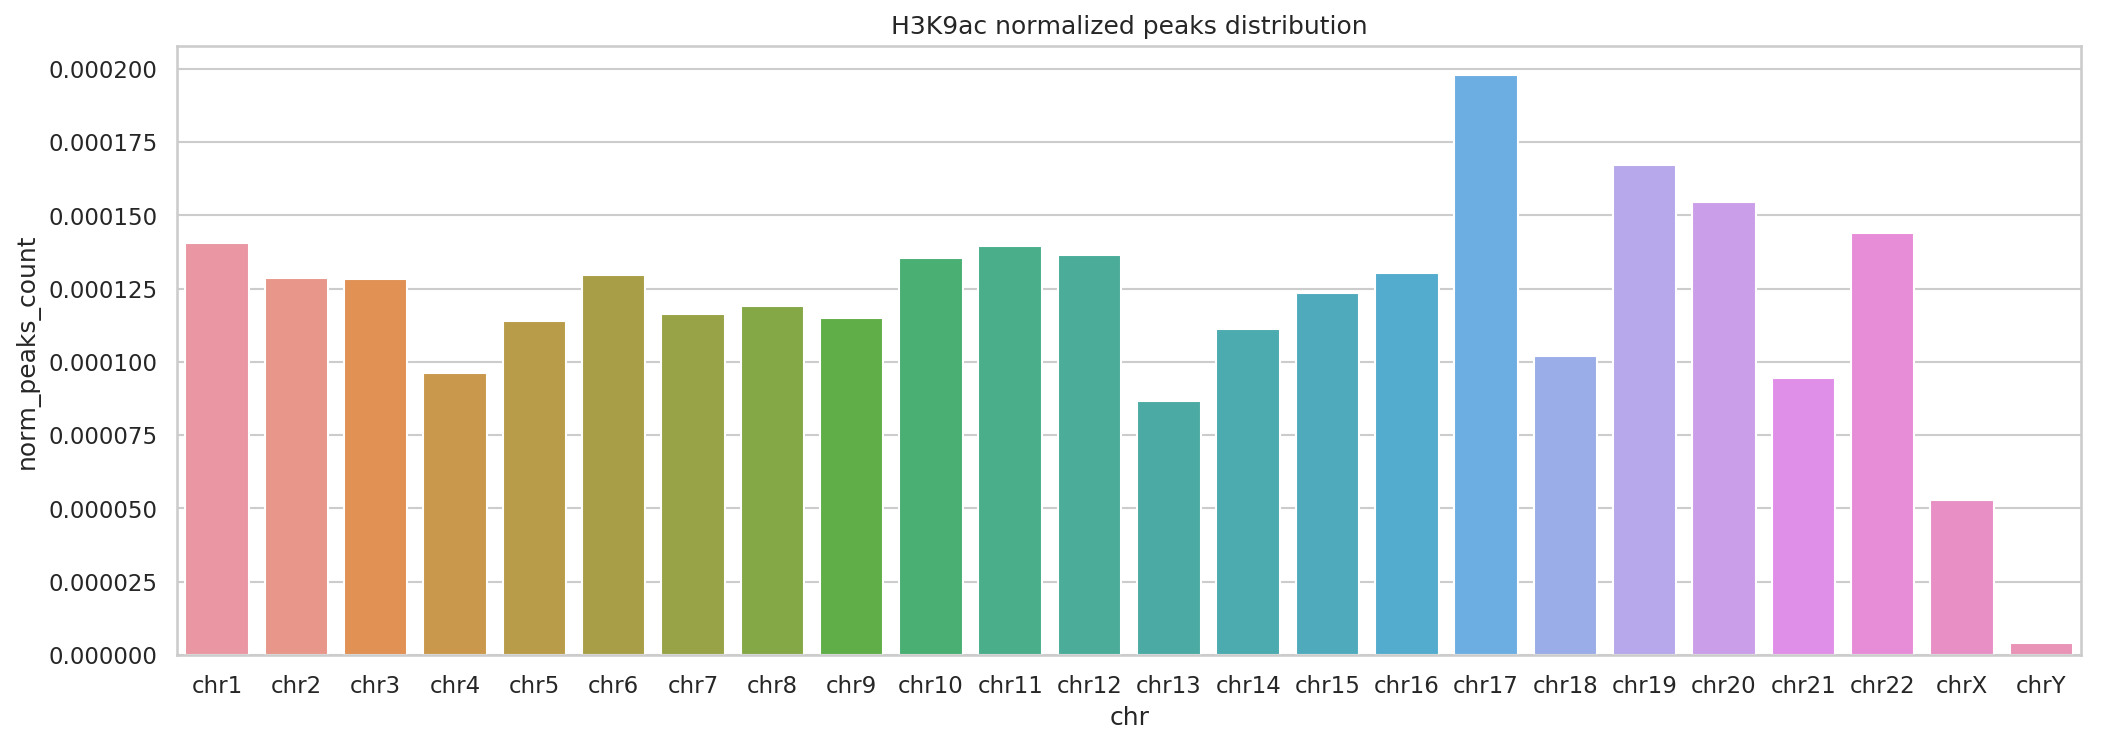

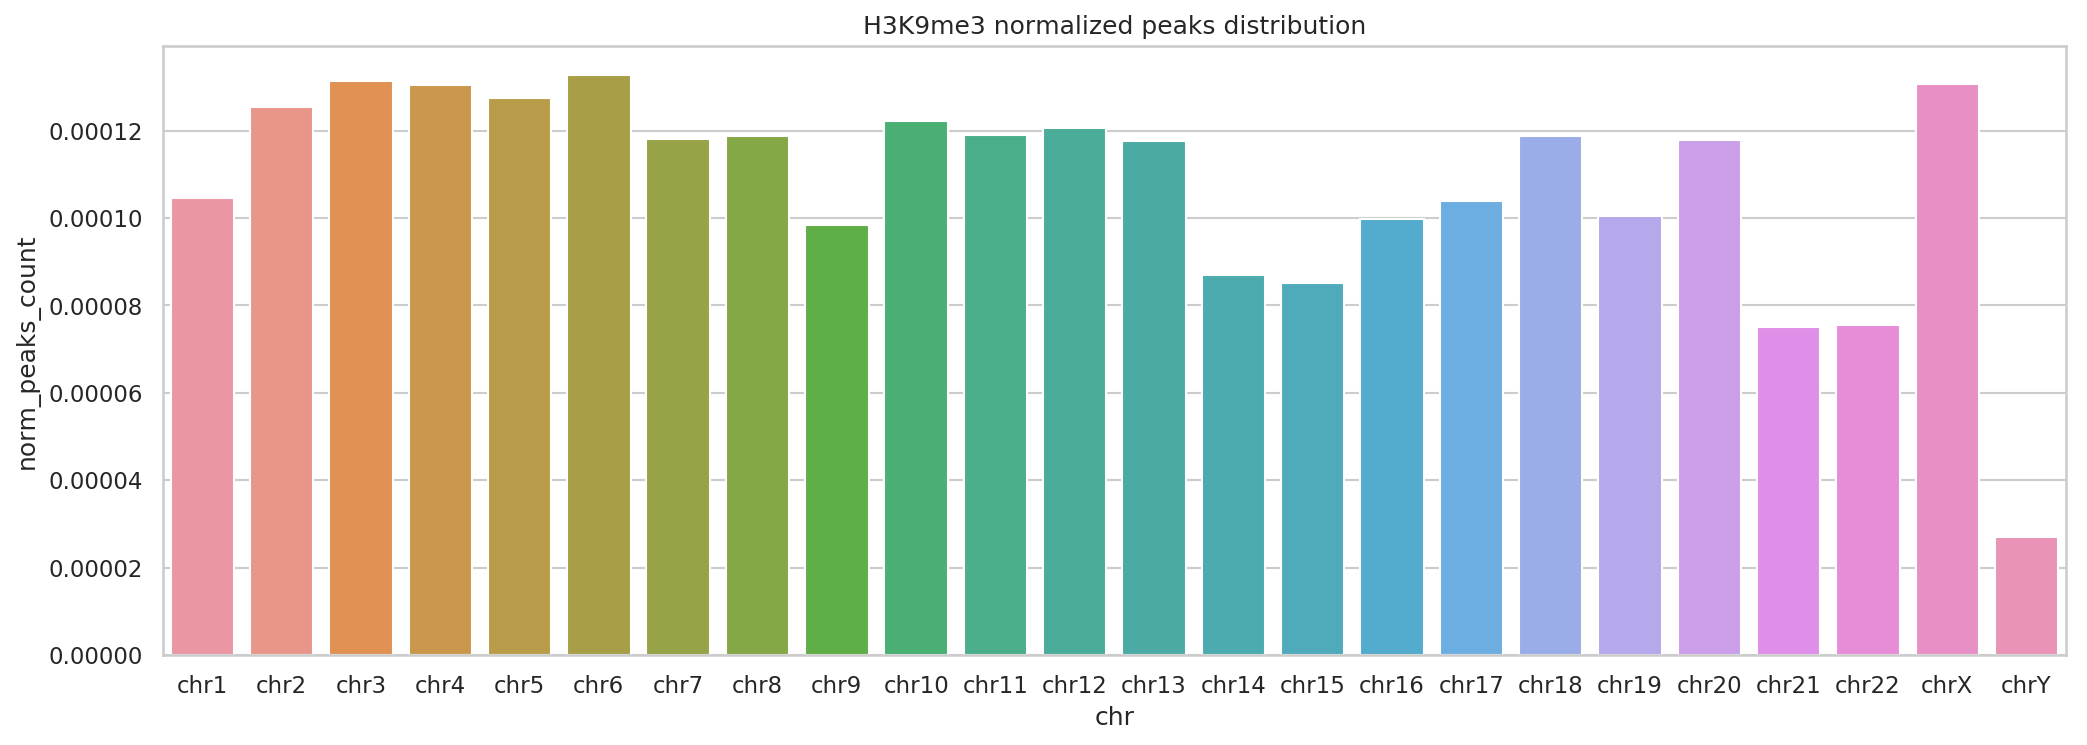

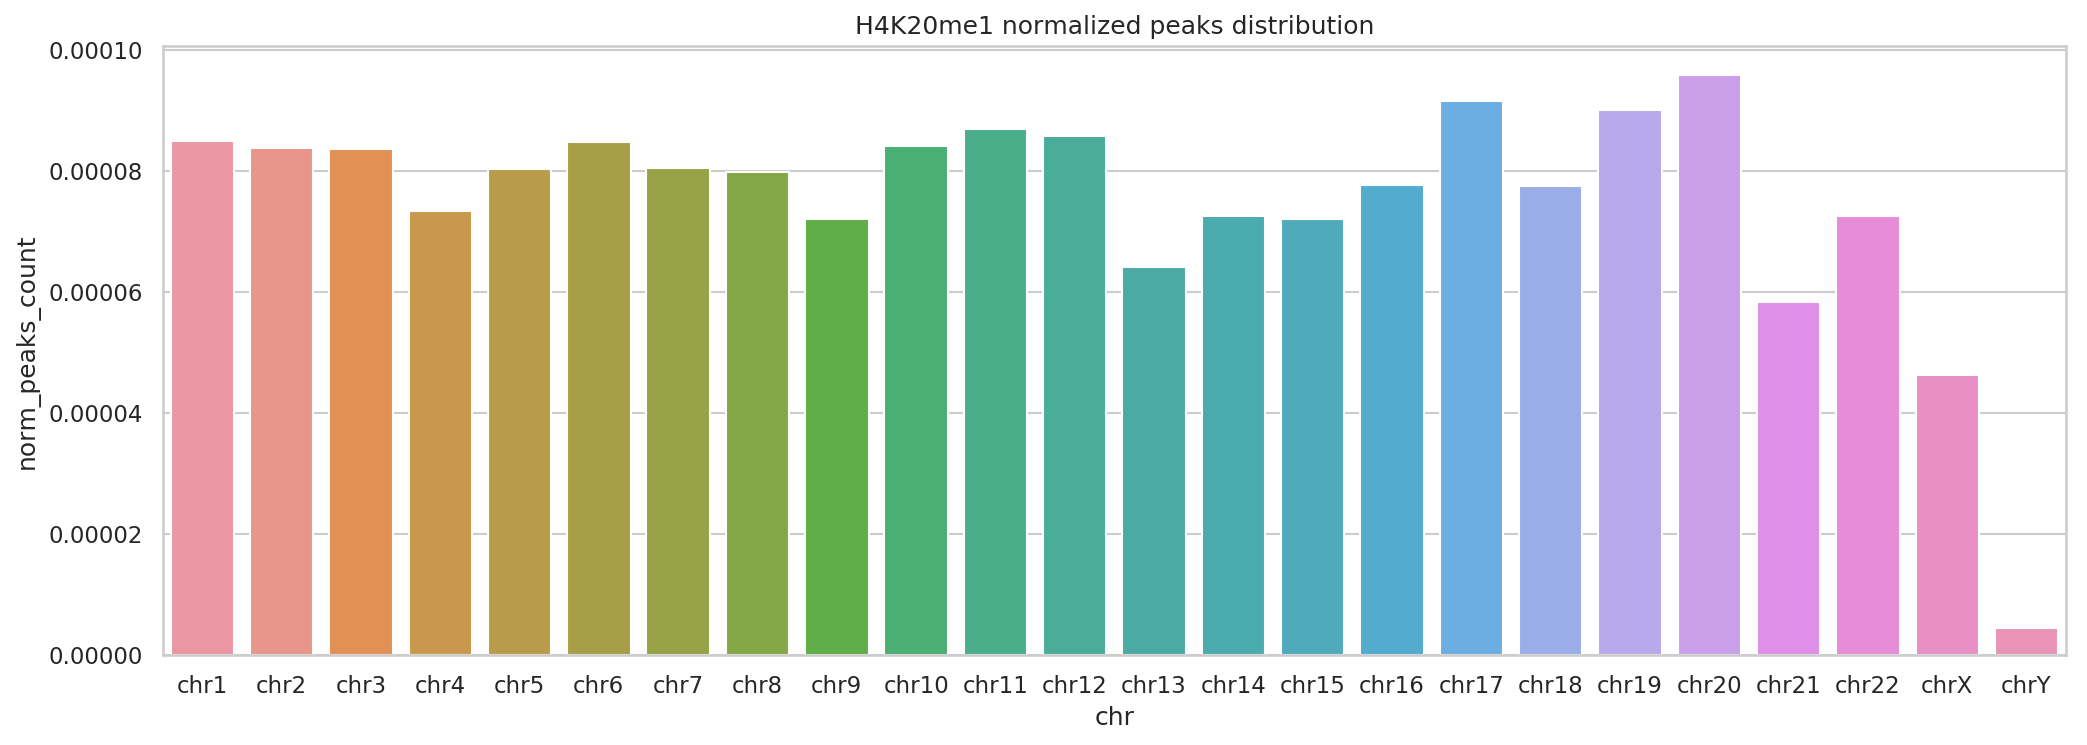

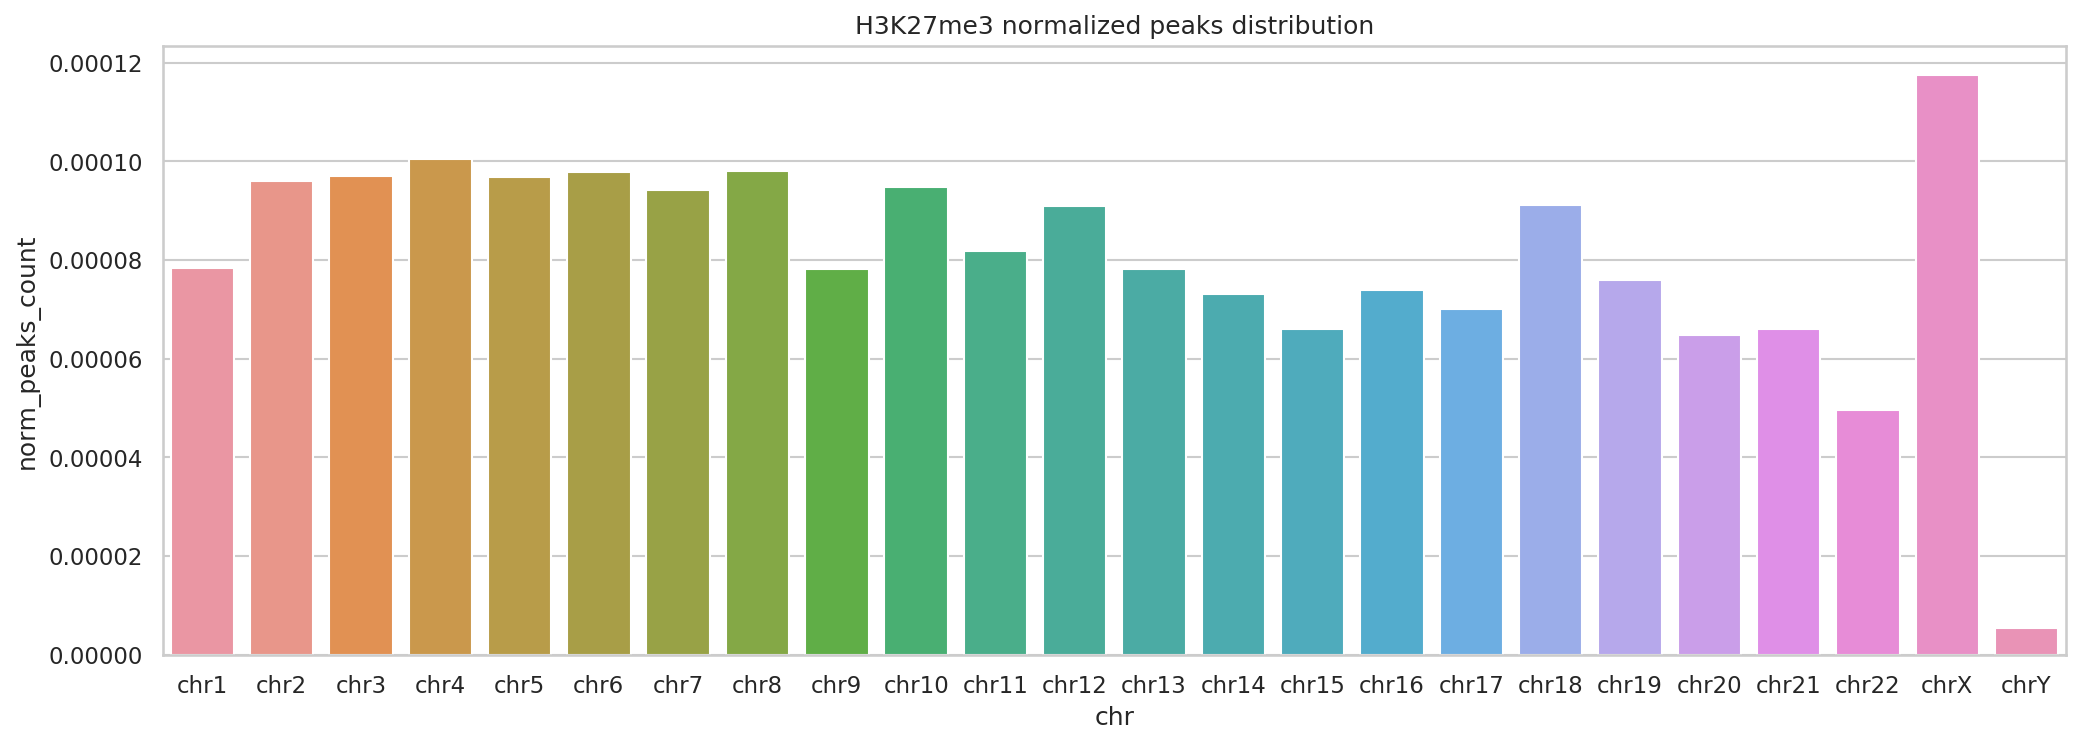

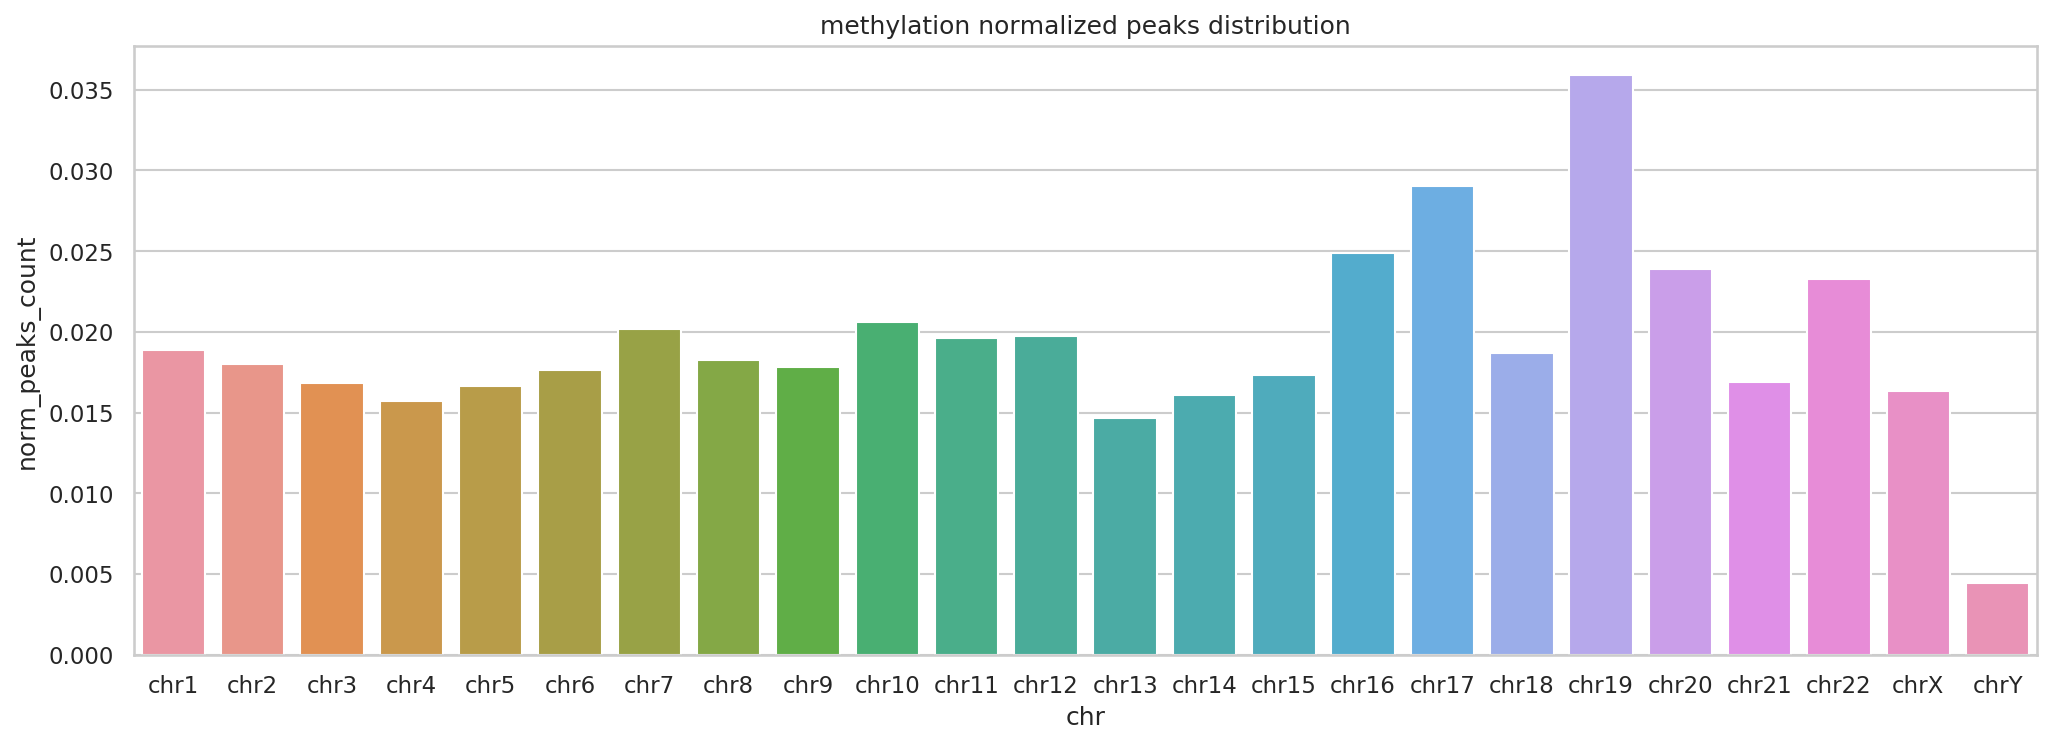

In [52]:
# Посмотреть на H3K27me3 и X хромосому
# Сравнить распределения пиков? Типа, в H3K9me3 и в H3K27me3 больше всего пиков в X хромосоме по сравнению с другими метками
# Нормализовать к средней длине хромосом
peaks_over_chroms = {}
for target in targets:
    peaks = pd.read_csv("../all_marks/" + target[0] + "/merged_peaks_first_in_biosample.bed", sep="\t", header=None)
    peaks = peaks[peaks[0].isin(['chr' + str(i) for i in range(1, 23)] + ['chrX', 'chrY'])]
    peaks_by_chrs = peaks.groupby([0]).count().sort_values([0], ascending=False)
    peaks_count = pd.DataFrame({"chr": peaks_by_chrs.index, 'peaks_count': peaks_by_chrs[1].tolist()}, index=[sort_chroms(c) for c in peaks_by_chrs.index])
    peaks_count = peaks_count.sort_index()
    peaks_count['norm_peaks_count'] = peaks_count['peaks_count'].divide(list(chrom_lengths.values()), axis=0)
    peaks_over_chroms[target[0]] = peaks_count
    
    plt.figure()
    sns.set(style="whitegrid")
    ax = sns.barplot(x="chr", y="norm_peaks_count", data=peaks_count).set_title(target[0] + " normalized peaks distribution")

In [175]:
2+2

4

In [174]:
for target in targets:
    print(target[0])
    if(target[0] == 'methylation'):
        for i in range(0, 19):
            with h5py.File("../all_marks/" + target[0] + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero_" + str(i) + ".hdf5", 'r') as f:
                lncRNAs = list(f['lncRNAs_names'][:])
                for gene_id in lncRNAs:
                    corr = f['corrs_matrix'][lncRNAs.index(gene_id), :]
                    get_lncRNA_counts(target[0], gene_id, corr)
    else:
        with h5py.File("../all_marks/" + target[0] + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero.hdf5", 'r') as f:
            lncRNAs = list(f['lncRNAs_names'][:])
            for gene_id in lncRNAs:
                corr = f['corrs_matrix'][lncRNAs.index(gene_id), :]
                get_lncRNA_counts(target[0], gene_id, corr)

H3K27ac
ENSG00000177822
+ corrs - max chr: chr4 bigger then thirdQ on 11 iqrs peaks count = 18
ENSG00000223764
+ corrs - max chr: chr22 bigger then thirdQ on 11 iqrs peaks count = 2
ENSG00000233937
- corrs - max chr: chr21 bigger then thirdQ on 11 iqrs with peaks count = 2
ENSG00000235641
+ corrs - max chr: chr17 bigger then thirdQ on 12 iqrs peaks count = 14
ENSG00000235885
+ corrs - max chr: chr10 bigger then thirdQ on 11 iqrs peaks count = 31
ENSG00000237188
+ corrs - max chr: chr22 bigger then thirdQ on 11 iqrs peaks count = 2
ENSG00000243224
- corrs - max chr: chr10 bigger then thirdQ on 13 iqrs with peaks count = 3
ENSG00000259583
+ corrs - max chr: chr15 bigger then thirdQ on 16 iqrs peaks count = 3
ENSG00000261656
+ corrs - max chr: chr21 bigger then thirdQ on 16 iqrs peaks count = 1
ENSG00000268388
+ corrs - max chr: chr16 bigger then thirdQ on 27 iqrs peaks count = 14
ENSG00000272368
+ corrs - max chr: chrX bigger then thirdQ on 37 iqrs peaks count = 2
ENSG00000272368
+ corrs

ENSG00000227398
+ corrs - max chr: chrY bigger then thirdQ on 22 iqrs peaks count = 21
ENSG00000227954
+ corrs - max chr: chr21 bigger then thirdQ on 11 iqrs peaks count = 3
ENSG00000231711
- corrs - max chr: chr14 bigger then thirdQ on 14 iqrs with peaks count = 1
ENSG00000231711
- corrs - min chr: chr1 fewer the firstQ on 12 iqrs peaks count = 1
ENSG00000232940
+ corrs - max chr: chr19 bigger then thirdQ on 12 iqrs peaks count = 24
ENSG00000235257
+ corrs - max chr: chr13 bigger then thirdQ on 22 iqrs peaks count = 1
ENSG00000260032
+ corrs - max chr: chrY bigger then thirdQ on 11 iqrs peaks count = 1
ENSG00000267278
- corrs - max chr: chrY bigger then thirdQ on 75 iqrs with peaks count = 13
ENSG00000267698
+ corrs - max chr: chr19 bigger then thirdQ on 11 iqrs peaks count = 8
ENSG00000278948
+ corrs - max chr: chrY bigger then thirdQ on 66 iqrs peaks count = 9
ENSG00000279050
- corrs - max chr: chr21 bigger then thirdQ on 18 iqrs with peaks count = 5
H3K9me3
ENSG00000197291
- corrs 

ENSG00000236790
+ corrs - max chr: chrX bigger then thirdQ on 114 iqrs peaks count = 3409
ENSG00000236830
+ corrs - max chr: chrX bigger then thirdQ on 13 iqrs peaks count = 227
ENSG00000237513
+ corrs - max chr: chrX bigger then thirdQ on 18 iqrs peaks count = 1414
ENSG00000238121
+ corrs - max chr: chrX bigger then thirdQ on 31 iqrs peaks count = 1270
ENSG00000240240
+ corrs - max chr: chrX bigger then thirdQ on 16 iqrs peaks count = 746
ENSG00000241158
+ corrs - max chr: chrX bigger then thirdQ on 28 iqrs peaks count = 198
ENSG00000241570
+ corrs - max chr: chr16 bigger then thirdQ on 15 iqrs peaks count = 22
ENSG00000241684
+ corrs - max chr: chrX bigger then thirdQ on 36 iqrs peaks count = 4011
ENSG00000241728
+ corrs - max chr: chrX bigger then thirdQ on 43 iqrs peaks count = 802
ENSG00000242258
+ corrs - max chr: chrX bigger then thirdQ on 24 iqrs peaks count = 83
ENSG00000247287
+ corrs - max chr: chrX bigger then thirdQ on 64 iqrs peaks count = 3283
ENSG00000248441
+ corrs - m

ENSG00000279981
+ corrs - max chr: chrX bigger then thirdQ on 46 iqrs peaks count = 1212
ENSG00000280138
+ corrs - max chr: chrX bigger then thirdQ on 18 iqrs peaks count = 199
ENSG00000280153
+ corrs - max chr: chrX bigger then thirdQ on 14 iqrs peaks count = 1291
ENSG00000280205
+ corrs - max chr: chrX bigger then thirdQ on 18 iqrs peaks count = 2305
ENSG00000280274
+ corrs - max chr: chrX bigger then thirdQ on 54 iqrs peaks count = 2755
ENSG00000280304
+ corrs - max chr: chrX bigger then thirdQ on 25 iqrs peaks count = 3512
ENSG00000280339
+ corrs - max chr: chrX bigger then thirdQ on 13 iqrs peaks count = 2030
ENSG00000280375
+ corrs - max chr: chrX bigger then thirdQ on 17 iqrs peaks count = 5198
ENSG00000280383
+ corrs - max chr: chrX bigger then thirdQ on 19 iqrs peaks count = 65
ENSG00000280392
+ corrs - max chr: chrX bigger then thirdQ on 14 iqrs peaks count = 333
ENSG00000280429
+ corrs - max chr: chrX bigger then thirdQ on 37 iqrs peaks count = 4923
ENSG00000282164
+ corrs -

In [137]:
firstQ, thirdQ = list(peaks_count_m_corr['norm_peaks_count'].quantile([0.25, 0.75]))
print("firstQ: " + str(firstQ))
print("thirdQ: " + str(thirdQ))
iQrange = iqr(peaks_count_m_corr['norm_peaks_count'])
print("iQrange: " + str(iQrange))
if peaks_count_m_corr.shape[0] > 0 and max(peaks_count_m_corr['norm_peaks_count']) > thirdQ + 10*iQrange:
    #print(lncRNA)
    max_chr = peaks_count_m_corr.loc[peaks_count_m_corr['norm_peaks_count'].idxmax()]
    print("- corrs - max chr: " + max_chr['chr'] + " bigger then thirdQ on " + str(math.ceil((max_chr['norm_peaks_count'] - thirdQ) / iQrange)) + " iqrs")

if peaks_count_m_corr.shape[0] > 0 and min(peaks_count_m_corr['norm_peaks_count']) < firstQ - 10*iQrange:
    #print(lncRNA)
    min_chr = peaks_count_m_corr.loc[peaks_count_m_corr['norm_peaks_count'].idxmin()]
    print("- corrs - min chr: " + min_chr['chr'] + " fewer the firstQ on " + str(math.ceil((firstQ - min_chr['norm_peaks_count']) / iQrange)) + " iqrs")

firstQ: 0.001957952482181446
thirdQ: 0.0050180603765266445
iQrange: 0.0030601078943451984
- corrs - max chr: chr21 bigger then thirdQ on 11 iqrs


In [173]:
#Складывать в струтуру
#Писать сколько всего пиков
def get_lncRNA_counts(target, lncRNA, corr):
    peaks = pd.read_csv("../all_marks/" + target + "/merged_peaks_first_in_biosample.bed", sep="\t", header=None)
        
    nonzero_corrs = corr[np.nonzero(corr)[0]]
    nonzero_peaks = ["peak_" + str(i) for i in np.nonzero(corr)[0]]
    df = pd.DataFrame(list(zip(nonzero_peaks, nonzero_corrs)), columns = ['peaks', 'corrs']) 

    peaks = peaks[peaks[3].isin(nonzero_peaks)]
    peaks = pd.merge(peaks, df, how='inner', left_on=3, right_on='peaks')[[0, 1, 2, 'corrs']]
    peaks = peaks[peaks[0].isin(["chr" + str(i) for i in range(1, 23)] + ["chrX", "chrY"])]
        
    peaks_by_chrs_p_corr = peaks[peaks['corrs'] > 0].groupby([0]).count().sort_values([0], ascending=False)
    peaks_count_p_corr = pd.DataFrame({"chr": peaks_by_chrs_p_corr.index, 'peaks_count': peaks_by_chrs_p_corr[1].tolist()}, index=[sort_chroms(c) for c in peaks_by_chrs_p_corr.index])
    peaks_count_p_corr = peaks_count_p_corr.sort_index()
    
    merged_peaks = peaks_over_chroms[target]
    merged_peaks_counts = list(merged_peaks[merged_peaks['chr'].isin(list(peaks_count_p_corr['chr']))]['peaks_count'])
    peaks_count_p_corr['norm_peaks_count'] = peaks_count_p_corr['peaks_count'].divide(merged_peaks_counts, axis=0)
    
    firstQ, thirdQ = list(peaks_count_p_corr['norm_peaks_count'].quantile([0.25, 0.75]))
    iQrange = iqr(peaks_count_p_corr['norm_peaks_count'])
    if peaks_count_p_corr.shape[0] > 0 and max(peaks_count_p_corr['norm_peaks_count']) > thirdQ + 10*iQrange:
        print(lncRNA)
        max_chr = peaks_count_p_corr.loc[peaks_count_p_corr['norm_peaks_count'].idxmax()]
        print("+ corrs - max chr: " + max_chr['chr'] + " bigger then thirdQ on " + str(math.ceil((max_chr['norm_peaks_count'] - thirdQ) / iQrange)) + " iqrs peaks count = " + str(max_chr['peaks_count']))

    if peaks_count_p_corr.shape[0] > 0 and min(peaks_count_p_corr['norm_peaks_count']) < firstQ - 10*iQrange:
        print(lncRNA)
        min_chr = peaks_count_p_corr.loc[peaks_count_p_corr['norm_peaks_count'].idxmin()]
        print("+ corrs - min chr: " + min_chr['chr'] + " fewer the firstQ on " + str(math.ceil((firstQ - min_chr['norm_peaks_count']) / iQrange)) + " iqrs peaks count = " + str(min_chr['peaks_count']))
        
    peaks_by_chrs_m_corr = peaks[peaks['corrs'] < 0].groupby([0]).count().sort_values([0], ascending=False)
    peaks_count_m_corr = pd.DataFrame({"chr": peaks_by_chrs_m_corr.index, 'peaks_count': peaks_by_chrs_m_corr[1].tolist()}, index=[sort_chroms(c) for c in peaks_by_chrs_m_corr.index])
    peaks_count_m_corr = peaks_count_m_corr.sort_index()
    
    merged_peaks = peaks_over_chroms[target]
    merged_peaks_counts = list(merged_peaks[merged_peaks['chr'].isin(list(peaks_count_m_corr['chr']))]['peaks_count'])
    peaks_count_m_corr['norm_peaks_count'] = peaks_count_m_corr['peaks_count'].divide(merged_peaks_counts, axis=0)
    
    firstQ, thirdQ = list(peaks_count_m_corr['norm_peaks_count'].quantile([0.25, 0.75]))
    iQrange = iqr(peaks_count_m_corr['norm_peaks_count'])
    if peaks_count_m_corr.shape[0] > 0 and max(peaks_count_m_corr['norm_peaks_count']) > thirdQ + 10*iQrange:
        print(lncRNA)
        max_chr = peaks_count_m_corr.loc[peaks_count_m_corr['norm_peaks_count'].idxmax()]
        print("- corrs - max chr: " + max_chr['chr'] + " bigger then thirdQ on " + str(math.ceil((max_chr['norm_peaks_count'] - thirdQ) / iQrange)) + " iqrs with peaks count = " + str(max_chr['peaks_count']))

    if peaks_count_m_corr.shape[0] > 0 and min(peaks_count_m_corr['norm_peaks_count']) < firstQ - 10*iQrange:
        print(lncRNA)
        min_chr = peaks_count_m_corr.loc[peaks_count_m_corr['norm_peaks_count'].idxmin()]
        print("- corrs - min chr: " + min_chr['chr'] + " fewer the firstQ on " + str(math.ceil((firstQ - min_chr['norm_peaks_count']) / iQrange)) + " iqrs peaks count = " + str(min_chr['peaks_count']))
    
    return peaks_count_p_corr, peaks_count_m_corr

In [ ]:
#===================================================================================================================================

In [115]:
def get_data_for_manhettan_plot(target, gene_id):
    
    peaks = pd.read_csv("../all_marks/" + target + "/merged_peaks_first_in_biosample.bed", sep="\t", header=None)
    if(target == 'methylation'):
        for i in range(0, 19):
            with h5py.File("../all_marks/" + target + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero_" + str(i) + ".hdf5", 'r') as f:
                lncRNAs = list(f['lncRNAs_names'][:])
                if gene_id in lncRNAs:
                    corrs = f['corrs_matrix'][lncRNAs.index(gene_id), :]
                    break
                else:
                    print("not in " + str(i) + " chunk")
    else:
        with h5py.File("../all_marks/" + target + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero.hdf5", 'r') as f:
            lncRNAs = list(f['lncRNAs_names'][:])
            corrs = f['corrs_matrix'][lncRNAs.index(gene_id), :]
        
    nonzero_corrs = corrs[np.nonzero(corrs)[0]]
    nonzero_peaks = ["peak_" + str(i) for i in np.nonzero(corrs)[0]]
    df = pd.DataFrame(list(zip(nonzero_peaks, nonzero_corrs)), columns = ['peaks', 'corrs']) 
    
    peaks = peaks[peaks[3].isin(nonzero_peaks)]
    peaks = pd.merge(peaks, df, how='inner', left_on=3, right_on='peaks')[[0, 1, 2, 'corrs']]
    peaks = peaks[peaks[0].isin(["chr" + str(i) for i in range(1, 23)] + ["chrX", "chrY"])]
    
    peaks['center'] = peaks[1] + np.ceil((peaks[2] - peaks[1])/2)  # метилирование?
    peaks_p = peaks[peaks['corrs'] > 0]
    peaks_m = peaks[peaks['corrs'] < 0]
    
    for chrom in set(['chr' + str(i) for i in range(1, 23)] + ['chrX', 'chrY']).difference(set(peaks_p[0])):
        peaks_p = peaks_p.append({0: chrom, 1:0, 2:0, 'corrs':0, 'center':0}, ignore_index=True)
    
    for chrom in set(['chr' + str(i) for i in range(1, 23)] + ['chrX', 'chrY']).difference(set(peaks_m[0])):
        peaks_m = peaks_m.append({0: chrom, 1:0, 2:0, 'corrs':0, 'center':0}, ignore_index=True)
        
    return peaks_p.to_numpy(), peaks_m.to_numpy()

In [310]:
p, m = get_data_for_manhettan_plot("H3K4me1", "ENSG00000274918")

In [315]:
m.shape

(7522, 5)

In [299]:
target = "H3K4me1"
gene_id = "ENSG00000274918"
with h5py.File("../all_marks/" + target + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero.hdf5", 'r') as f:
    lncRNAs = list(f['lncRNAs_names'][:])
    corrs = f['corrs_matrix'][lncRNAs.index(gene_id), :]
        
nonzero_corrs = corrs[np.nonzero(corrs)[0]]
nonzero_peaks = ["peak_" + str(i) for i in np.nonzero(corrs)[0]]
df = pd.DataFrame(list(zip(nonzero_peaks, nonzero_corrs)), columns = ['peaks', 'corrs']) 
    
peaks = peaks[peaks[3].isin(nonzero_peaks)]
#peaks = pd.merge(peaks, df, how='inner', left_on=3, right_on='peaks')[[0, 1, 2, 'corrs']]
#peaks = peaks[peaks[0].isin(["chr" + str(i) for i in range(1, 23)] + ["chrX", "chrY"])]
    
#peaks['center'] = peaks[1] + np.ceil((peaks[2] - peaks[1])/2)  # метилирование?
#peaks_p = peaks[peaks['corrs'] > 0]
#peaks_m = peaks[peaks['corrs'] < 0]

{'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr2',
 'chr20',
 'chr21',
 'chr22',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chrX',
 'chrY'}

In [309]:
peaks[0].value_counts()

chr1    9966
Name: 0, dtype: int64

In [167]:
def sort_chroms(chrom):
    return int(chrom.split('chr')[1] if chrom.split('chr')[1]!='X' and chrom.split('chr')[1] != 'Y' else 40 if chrom.split('chr')[1]=='X' else 41)

In [ ]:
peaks_p_np, peaks_m_np = get_data_for_manhettan_plot("methylation", 'ENSG00000240240')#JPX
manhattan(     np.array([abs(p) for p in peaks_m_np[:, 3]]), peaks_m_np[:, 4], peaks_m_np[:, 0].astype(str), 'negative_correlation',
               p2=peaks_p_np[:, 3], pos2=peaks_p_np[:, 4], chr2=peaks_p_np[:, 0].astype(str), label2='positive_correlation',
               plot_type='inverted',
               title='TSIX<->H3K27me3 correlations',
               chrs_plot=sorted(['chr' + str(i) for i in range(1, 23)] + ['chrX', 'chrY'], key=sort_chroms),
               xlabel='chromosome',
               ylabel='corr',
               cut=0.45,
               lines= [],
               top1 = 0.9,
               top2 = 0.9,
               colors = colors,
               scaling = 'none')

not in 0 chunk
not in 1 chunk
not in 2 chunk
not in 3 chunk
not in 4 chunk


0

not in 0 chunk


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0

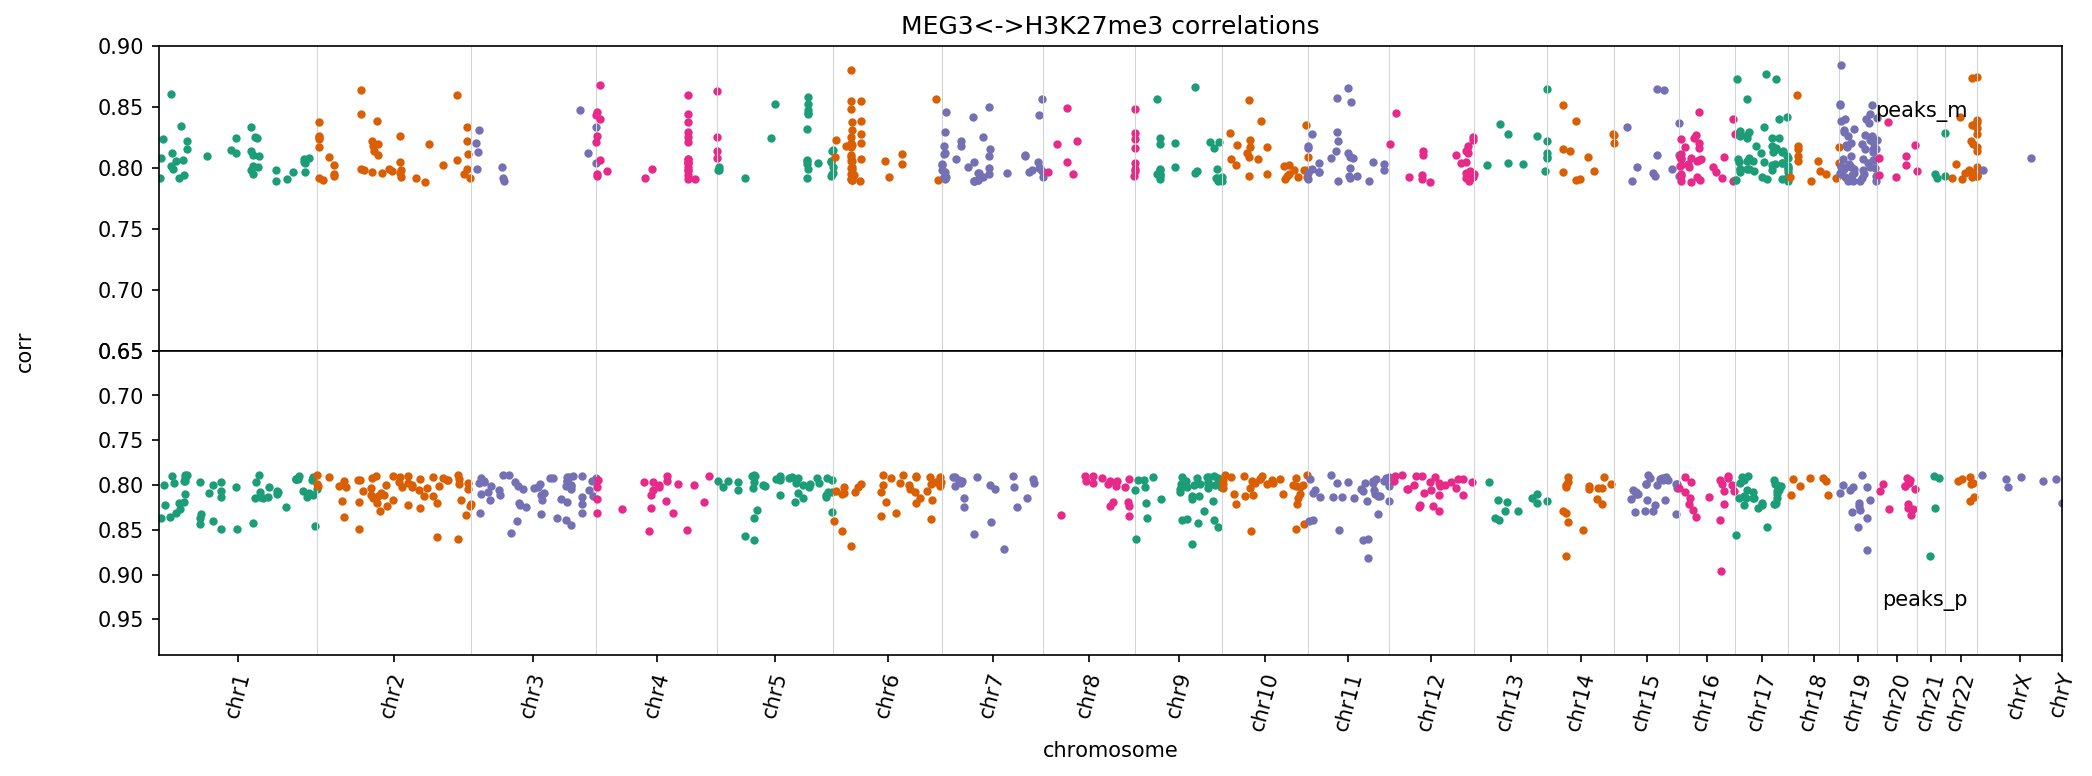

In [26]:
peaks_p_np, peaks_m_np = get_data_for_manhettan_plot("methylation", 'ENSG00000214548')#MEG3
manhattan(     np.array([abs(p) for p in peaks_m_np[:, 3]]), peaks_m_np[:, 4], peaks_m_np[:, 0].astype(str), 'peaks_m',
               p2=peaks_p_np[:, 3], pos2=peaks_p_np[:, 4], chr2=peaks_p_np[:, 0].astype(str), label2='peaks_p',
               plot_type='inverted',
               title='MEG3<->H3K27me3 correlations',
               chrs_plot=sorted(['chr' + str(i) for i in range(1, 23)] + ['chrX', 'chrY'], key=sort_chroms),
               xlabel='chromosome',
               ylabel='corr',
               cut=0.65,
               lines= [],
               top1 = 0.9,
               top2 = 0.99,
               colors = colors,
               scaling = 'none')

In [118]:
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

def manhattan(p1, pos1, chr1, label1,
               p2=None, pos2=None, chr2=None, label2=None,
               plot_type='single',
               chrs_plot=None, chrs_names=None,
               cut = 2,
               colors = ['k', '0.5'],
               title='Title',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               top1 = 0,
               top2 = 0,
               lines = [10, 15],
               lines_colors = ['g', 'r'],
               zoom = None,
               scaling = '-log10'):
    '''
    Static Manhattan plot
    :param p1: p-values for the top panel
    :param pos1: positions
    :param chr1: chromosomes numbers
    :param label1: label
    :param p2: p-values fpeaks_p_np, peaks_m_np = get_data_for_manhettan_plot("H3K9me3", 'ENSG00000225470')#FTX
manhattan(     np.array([abs(p) for p in peaks_m_np[:, 3]]), peaks_m_np[:, 4], peaks_m_np[:, 0].astype(str), 'peaks_m',
               p2=peaks_p_np[:, 3], pos2=peaks_p_np[:, 4], chr2=peaks_p_np[:, 0].astype(str), label2='peaks_p',
               plot_type='inverted',
               title='FTX<->H3K9me3 correlations',
               chrs_plot=sorted(['chr' + str(i) for i in range(1, 23)] + ['chrX', 'chrY'], key=sort_chroms),
               xlabel='chromosome',
               ylabel='corr',
               cut=0.45,
               lines= [],
               top1 = 0.8,
               top2 = 0.8,
               colors = colors,
               scaling = 'none')or the bottom panel
    :param pos2: positions
    :param chr2: chromosomes numbers
    :param label2: label
    :param type: Can be 'single', 'double' or 'inverted'
    :param chrs_plot: list of chromosomes that should be plotted. If empty [] all chromosomes will be plotted
    :param cut: lower cut (default 2)
    :param colors: sequence of colors (default: black/gray)
    :param title: defines the title of the plot
    :param xlabel: defines the xlabel of the plot
    :param ylabel: defines the ylabel of the plot
    :param top: Defines the upper limit of the plot. If 0, it is detected automatically.
    :param lines: Horizontal lines to plot.
    :param lines_colors: Colors for the horizontal lines.
    :param zoom: [chromosome, position, range] Zooms into a region.
    :param scaling: '-log10' or 'none' (default -log10)
    :return:
    '''

    # Setting things up
    shift=np.array([0.0])
    plt.clf()

    # If chrs_plot is empty, we need to generate a list of chromosomes
    if chrs_plot is None:
        chrs_list = np.unique(chr1)
        if isinstance(chrs_list[0], str):
            chrs_list = sorted_nicely(chrs_list)
        else:
            chrs_list.sort()
    else:
        chrs_list = chrs_plot


    # If chrs_names is empty, we need to generate a list of names for chromosomes
    if chrs_names is None:
        chrs_names = [str(chrs_list[i]) for i in range(len(chrs_list))]

    plot_positions = False
    if len(chrs_list) == 1:
        plot_positions = True

    
    for ii, i in enumerate(chrs_list):
        if plot_type != 'single':
            ax1 = plt.subplot(2,1,1)
        else:
            plt.subplot(1,1,1)
        # print(i)
        filt = np.where(chr1==i)[0]
        x = shift[-1]+pos1[filt]
        if scaling=='-log10':
            y = -np.log10(p1[filt])
        elif scaling=='none':
            y = p1[filt]
        else:
            raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
        plt.plot(x[y>cut], y[y>cut], '.', color=colors[ii % len(colors)])
        shift_f = np.max(x)

        if zoom is not None:
            if zoom[0] == i:
                zoom_shift = zoom[1] + shift[-1]

        if plot_type != 'single':
            ("print pos2:")
            plt.subplot(2,1,2)#, sharex=ax1)
            filt = np.where(chr2==i)[0]
            x = shift[-1]+pos2[filt]
            if scaling=='-log10':
                y = -np.log10(p2[filt])
            elif scaling=='none':
                y = p2[filt]
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
            plt.plot(x[y>cut], y[y>cut], '.', color=colors[ii % len(colors)])
            shift_m = np.max(x)
        else:
            shift_m = 0

        shift = np.append(shift, np.max([shift_f, shift_m]))

        if plot_type != 'single':
            plt.subplot(2,1,1)
        else:
            plt.subplot(1,1,1)
        plt.plot([shift[-1], shift[-1]], [0, 1000], '-k', lw=0.5, color='lightgray')
        plt.xlim([0, shift[-1]])

        if plot_type != 'single':
            plt.subplot(2,1,2)
            plt.plot([shift[-1], shift[-1]], [0, 1000], '-k', lw=0.5, color='lightgray')
            plt.xlim([0, shift[-1]])
        # print(shift)

    # Defining top boundary of a plot
    if top1 == 0:
        if plot_type != 'single':
            if scaling == '-log10':
                top1 = np.ceil(np.max([np.max(-np.log10(p1)), np.max(-np.log10(p2))]))
            elif scaling == 'none':
                top1 = np.ceil(np.max([np.max(p1), np.max(p2)]))
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
        else:
            if scaling == '-log10':
                top1 = np.ceil(np.max(-np.log10(p1)))
            elif scaling == 'none':
                top1 = np.ceil(np.max(p1))
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')


    if top2 == 0:
        if plot_type != 'single':
            top2 = top1

    # Setting up the position of labels:
    shift_label = shift[-1]
    shift = (shift[1:]+shift[:-1])/2.
    labels = chrs_names

    # Plotting horizontal lines
    for i, y in enumerate(lines):
        if plot_type != 'single':
            plt.subplot(2,1,1)
            plt.plot([0, shift_label], [y, y], color = lines_colors[i])
            plt.subplot(2,1,2)
            plt.plot([0, shift_label], [y, y], color = lines_colors[i])
        else:
            plt.subplot(1,1,1)
            plt.plot([0, shift_label], [y, y], color = lines_colors[i])

    if plot_type != 'single':
        plt.subplot(2,1,1)
        if not plot_positions:
            plt.xticks(shift, labels, rotation=75)
        plt.ylim([cut, top1])
    else:
        plt.subplot(1,1,1)
        plt.ylim([cut, top1])
        plt.xticks(rotation=75)
    plt.title(title)
    if plot_type != 'single':
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        if not plot_positions:
            plt.xticks(shift, rotation=75)
    else:
        if not plot_positions:
            plt.xticks(shift, labels, rotation=75)

    plt.text(shift_label*0.95,top1*0.95,label1,#bbox=dict(boxstyle="round", fc="1.0"),
            verticalalignment='top', horizontalalignment='right')

    if plot_type != 'single':
        plt.subplot(2,1,2)
        plt.ylim([cut, top2])
        if plot_type == 'inverted':
            plt.gca().invert_yaxis()
            #plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))
        if not plot_positions:
            plt.xticks(shift, labels, rotation=75)
        if plot_type == 'inverted':
            plt.text(shift_label*0.95,top2*0.95,label2,#bbox=dict(boxstyle="round", fc="1.0"),
                verticalalignment='bottom', horizontalalignment='right')
        else:
            plt.text(shift_label*0.95,top2*0.95,label2,#bbox=dict(boxstyle="round", fc="1.0"),
                verticalalignment='top', horizontalalignment='right')
        plt.ylabel(ylabel)
        plt.gca().yaxis.set_label_coords(-0.065,1.)
        plt.xlabel(xlabel)
        # plt.tight_layout(hspace=0.001)
        plt.subplots_adjust(hspace=0.00)
    else:
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)

    if zoom is not None:
        if plot_type != 'single':
            plt.subplot(2,1,1)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])
            plt.subplot(2,1,2)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])
        else:
            plt.subplot(1,1,1)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])

    return 0

In [119]:
def format_func(value, tick_number):
    return "-" + str(value)

In [180]:
stats = {}

In [355]:
#Названия РНОК зависят от версии генома бывает
stats['methylation'].keys()
#TODO: проверить fewer!!
#TODO: возможно этой процедурой можно чистить пики?

dict_keys(['ZFAS1', 'CADM3-AS1', 'AL157373.2', 'AL355312.2', 'BX664727.3', 'LINC00989', 'AC025470.2', 'AC007637.1', 'PLBD1-AS1', 'AC125611.4', 'AC022819.1', 'AC008770.3', 'AGAP11', 'AC090186.1', 'AC015712.6', 'PCCA-DT', 'AC048382.6'])

In [354]:
from collections import defaultdict
tmp = [('ENSG00000177410', '-', 'chrX', 'bigger', '15', 804),
('ENSG00000225670', '+', 'chrX', 'bigger', '25', 17234),
('ENSG00000229896', '-', 'chrX', 'bigger', '25', 255),
('ENSG00000231760', '+', 'chrX', 'bigger', '19', 1091),
('ENSG00000240240', '+', 'chrX', 'bigger', '30', 5634),
('ENSG00000250334', '+', 'chrX', 'bigger', '18', 3259),
('ENSG00000250961', '+', 'chrX', 'bigger', '153', 99),
('ENSG00000256139', '+', 'chrX', 'bigger', '13', 891),
('ENSG00000256751', '+', 'chrX', 'bigger', '14', 39689),
('ENSG00000258334', '-', 'chrX', 'bigger', '27', 89),
('ENSG00000259921', '+', 'chrY', 'bigger', '11', 1101),
('ENSG00000267274', '+', 'chrX', 'bigger', '107', 693),
('ENSG00000267274', '-', 'chrX', 'bigger', '207', 7401),
('ENSG00000271880', '+', 'chrY', 'bigger', '13', 4223),
('ENSG00000272076', '+', 'chrX', 'bigger', '18', 4449),
('ENSG00000272808', '+', 'chrX', 'bigger', '14', 1516),
('ENSG00000274605', '-', 'chrX', 'bigger', '16', 4402),
('ENSG00000276278', '+', 'chrX', 'bigger', '22', 432)]

hm = defaultdict(list)
stats['methylation'] = hm
for t in tmp:
    gene_name = get_gene_name(t[0])
    corrs_sign = {}
    corrs_sign[t[1]] = t
    hm[gene_name].append(corrs_sign)

querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.
querying 1-1...done.
Finished.


In [343]:
def get_gene_name(gene_id):
    mg = mygene.MyGeneInfo()
    out = mg.querymany([gene_id], scopes='ensembl.gene', fields="symbol", species='human', 
                           returnall=True, as_dataframe=True)
    with_symbol = out['out']
    del with_symbol.index.name
    with_symbol['ensembl_id'] = with_symbol.index
    if 'symbol' in with_symbol.columns:
        with_symbol = with_symbol.reset_index()[['ensembl_id', 'symbol']]
        with_symbol = with_symbol[with_symbol['symbol'].notnull()]
        
    return with_symbol.loc[0]['symbol']

0

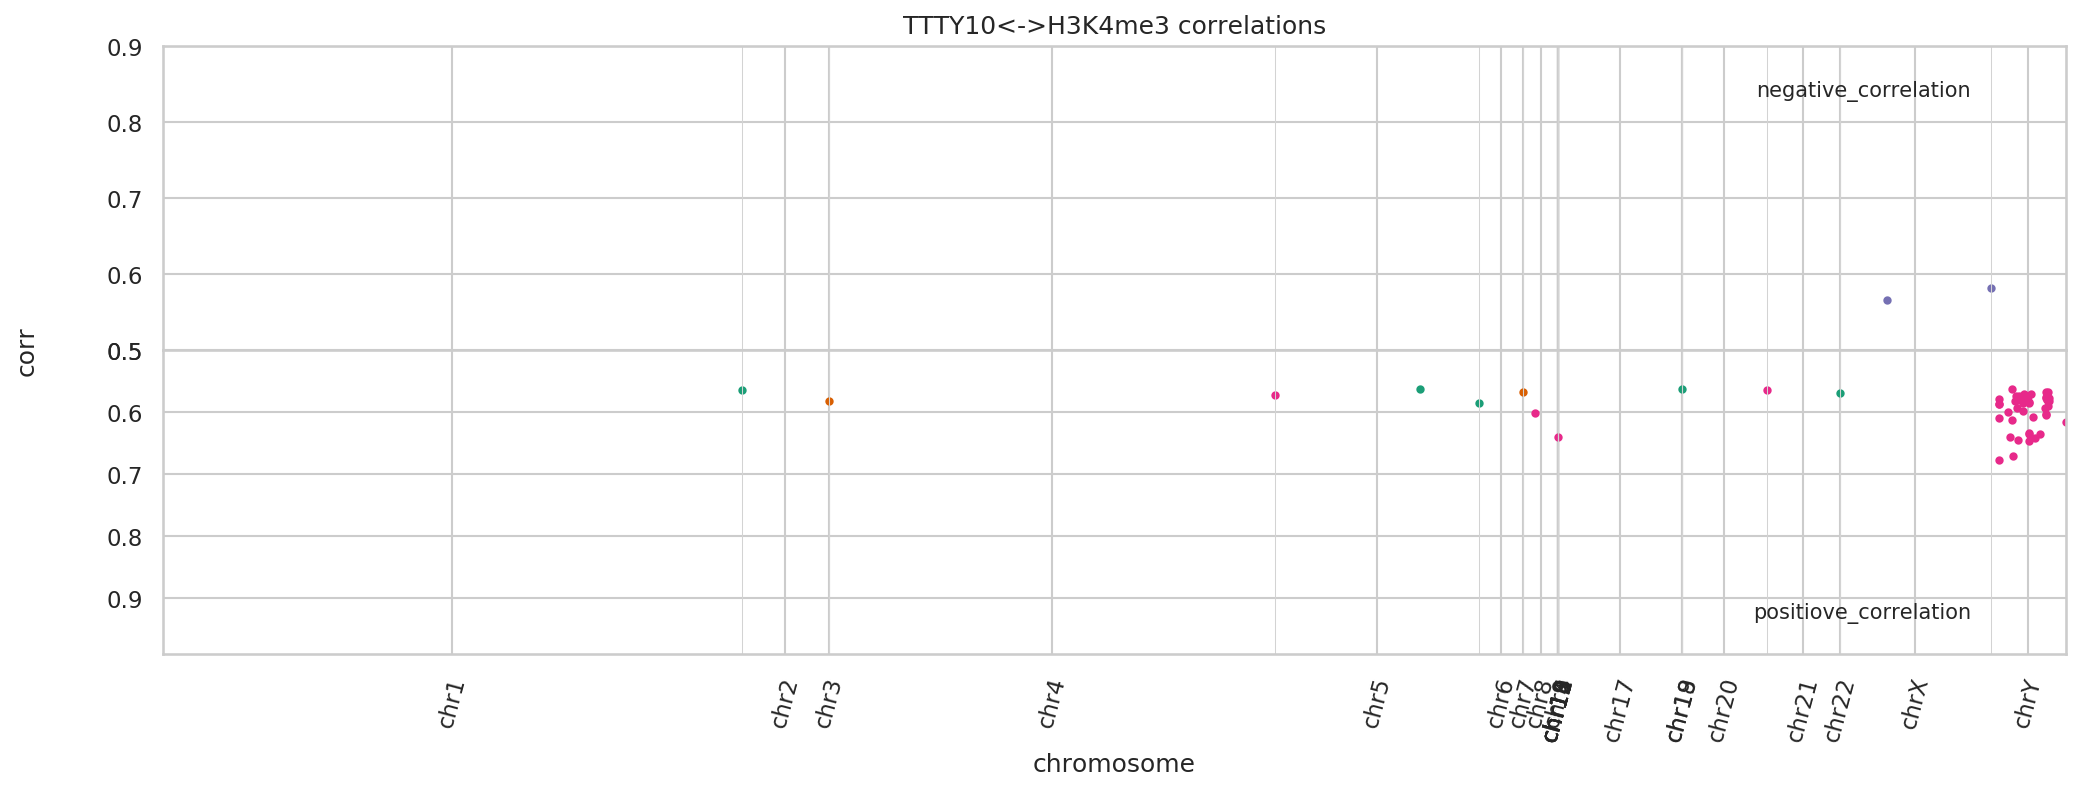

In [395]:
peaks_p_np, peaks_m_np = get_data_for_manhettan_plot("H3K4me3", 'ENSG00000229236')#TTTY10
manhattan(     np.array([abs(p) for p in peaks_m_np[:, 3]]), peaks_m_np[:, 4], peaks_m_np[:, 0].astype(str), 'negative_correlation',
               p2=peaks_p_np[:, 3], pos2=peaks_p_np[:, 4], chr2=peaks_p_np[:, 0].astype(str), label2='positiove_correlation',
               plot_type='inverted',
               title='TTTY10<->H3K4me3 correlations',
               chrs_plot=sorted(['chr' + str(i) for i in range(1, 23)] + ['chrX', 'chrY'], key=sort_chroms),
               xlabel='chromosome',
               ylabel='corr',
               cut=0.5,
               lines= [],
               top1 = 0.9,
               top2 = 0.99,
               colors = colors,
               scaling = 'none')

In [ ]:
#1)X хромосома: если есть, то обычно только один знак строко
#2)Взаимодействие пиков X и Y хромосом: обычно они взаимоисключающие и разного знака, а иногда просто только одного знака
#)Посмотреть на конкретные цифры экспрессии/сигала (в каких тканях) + в каких местах(сделать GO?)
#)Доработать метод для выбрасывания лишних пиков?
#)Хотим узнать если ли у меток пересечения по нкРНК, по хромосомам
#)Если пересекаются, то в одинаковых ли местах пики?(и связаны ли они как-нибудь? GO может?)
#)Нарисовать хитмап
#)Пересечь с кластерами

In [384]:
stats_hm_lncRNAs = {}
for hm in stats.keys():
    stats_hm_lncRNAs[(hm,)] = list(stats[hm].keys())

In [385]:
stats_hm_lncRNAs

{('H3K27ac',): ['TNM3-AS1',
  'LINC00484',
  'LINC01828',
  'FENDRR',
  'AC011297.1',
  'AC254629.1'],
 ('H3K36me3',): ['AL162586.1',
  'LINC00937',
  'AL590764.1',
  'Z97192.3',
  'AL162258.1',
  'LINC02391',
  'AC005538.2',
  'CU634019.6 '],
 ('H3K4me1',): ['AC134312.1',
  'HCG27',
  'KIF9-AS1',
  'MIR34AHG',
  'AL590764.1',
  'LINC01684',
  'AC099343.4 ',
  'LINC01215',
  'AL662844.4',
  'AC116447.1',
  'TRG-AS1'],
 ('H3K4me3',): ['ITPKB-IT1',
  'TTTY10',
  'AC107464.1',
  'OIP5-AS1',
  'CTD-2324F15.2',
  'LCMT1-AS1',
  'AC010210.1',
  'AC069224.1',
  'AC104964.4',
  'AC107308.1'],
 ('H3K9ac',): ['ZNF667-AS1', 'KIF9-AS1', 'HCG25'],
 ('H3K9me3',): ['RAMP2-AS1',
  'AC010336.1',
  'JPX',
  'FAM30A',
  'EPHA1-AS1',
  'AL391839.2',
  'LINC01197',
  'AL117190.1',
  'AC009053.3',
  'ZNNT1',
  'AC132192.2',
  'AC011297.1',
  'AC018695.6',
  'AC006449.5',
  'AL357033.4',
  'AC107308.1',
  'AC073263.2',
  'AC104260.2'],
 ('H4K20me1',): ['LINC00174',
  'AP003027.1',
  'MIR194-2HG',
  'AC093752

In [388]:
from itertools import combinations
for comb in combinations(stats_hm_lncRNAs.keys(), 2):
    if len(set(comb[0]).intersection(set(comb[1]))) == 0:
        s = set(stats_hm_lncRNAs[comb[0]]).intersection(set(stats_hm_lncRNAs[comb[1]]))
        if len(s) > 0:
            print(comb[0] + comb[1])
            print(s)
            if tuple(sorted(comb[0] + comb[1])) not in stats_hm_lncRNAs:
                stats_hm_lncRNAs[tuple(sorted(comb[0] + comb[1]))] = list(s)

('H3K27ac', 'H3K9me3')
{'AC011297.1'}
('H3K36me3', 'H3K4me1')
{'AL590764.1'}
('H3K36me3', 'H3K27me3')
{'LINC00937'}
('H3K4me1', 'H3K9ac')
{'KIF9-AS1'}
('H3K4me1', 'H3K27me3')
{'KIF9-AS1', 'LINC01215'}
('H3K4me1', 'H3K27me3', 'H3K9ac')
{'KIF9-AS1'}
('H3K4me3', 'H3K9me3')
{'AC107308.1'}
('H3K9ac', 'H3K27me3')
{'KIF9-AS1'}
('H3K9ac', 'H3K27me3', 'H3K4me1')
{'KIF9-AS1'}
('H3K9me3', 'H3K27me3')
{'AL357033.4', 'FAM30A', 'RAMP2-AS1', 'AC104260.2', 'LINC01197'}
('H3K27me3', 'methylation')
{'PLBD1-AS1', 'BX664727.3', 'AC090186.1'}
('H3K27me3', 'H3K4me1', 'H3K9ac')
{'KIF9-AS1'}


In [389]:
stats_hm_lncRNAs

{('H3K27ac',): ['TNM3-AS1',
  'LINC00484',
  'LINC01828',
  'FENDRR',
  'AC011297.1',
  'AC254629.1'],
 ('H3K36me3',): ['AL162586.1',
  'LINC00937',
  'AL590764.1',
  'Z97192.3',
  'AL162258.1',
  'LINC02391',
  'AC005538.2',
  'CU634019.6 '],
 ('H3K4me1',): ['AC134312.1',
  'HCG27',
  'KIF9-AS1',
  'MIR34AHG',
  'AL590764.1',
  'LINC01684',
  'AC099343.4 ',
  'LINC01215',
  'AL662844.4',
  'AC116447.1',
  'TRG-AS1'],
 ('H3K4me3',): ['ITPKB-IT1',
  'TTTY10',
  'AC107464.1',
  'OIP5-AS1',
  'CTD-2324F15.2',
  'LCMT1-AS1',
  'AC010210.1',
  'AC069224.1',
  'AC104964.4',
  'AC107308.1'],
 ('H3K9ac',): ['ZNF667-AS1', 'KIF9-AS1', 'HCG25'],
 ('H3K9me3',): ['RAMP2-AS1',
  'AC010336.1',
  'JPX',
  'FAM30A',
  'EPHA1-AS1',
  'AL391839.2',
  'LINC01197',
  'AL117190.1',
  'AC009053.3',
  'ZNNT1',
  'AC132192.2',
  'AC011297.1',
  'AC018695.6',
  'AC006449.5',
  'AL357033.4',
  'AC107308.1',
  'AC073263.2',
  'AC104260.2'],
 ('H4K20me1',): ['LINC00174',
  'AP003027.1',
  'MIR194-2HG',
  'AC093752

In [392]:
stats['H3K27me3']['KIF9-AS1']

[{'-': ('ENSG00000227398', '-', 'chr19', 'bigger', 12, 42)}]

In [393]:
stats['H3K4me1']['KIF9-AS1']

{'-': ('chr19', 'bigger', 19, 122)}

In [394]:
stats['H3K9ac']['KIF9-AS1']

{'+': ('chrY', 'bigger', 22, 21)}

In [ ]:
for s, genes in stats_hm_lncRNAs.items():
    if len(s) > 1:
        for gene in genes:
            for hm in s:
                content = stats[hm][gene]
                if 